In [2]:
import os
os.chdir(r'C:\Users\metro\DataMining\Notebook')
os.getcwd()

'C:\\Users\\metro\\DataMining\\Notebook'

In [535]:
import pandas as pd
# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns


#SeoulBikeData = pd.read_csv('data/SeoulBikeData.csv',na_values='NA') #error 'utf-8' codec can't decode byte 0xb0 in position 12: invalid start byte
SeoulBikeData = pd.read_csv('data/SeoulBikeData.csv',encoding='ISO-8859-1',na_values='NA')

In [536]:
#COPY OF DATASET
SeoulBikeData_Original=SeoulBikeData[:]

In [528]:
SeoulBikeData.shape

(8760, 14)

In [ ]:
#This dataframe presents the rented bike count in this city of Seoul. It is presented as a time series which presents the data with a step of an hour.
#For each hour, the dataframe mainly presents weather conditions and information about the day.

In [529]:
SeoulBikeData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [83]:
SeoulBikeData.head(7)

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   
5  01/12/2017                100     5             -6.4           37   
6  01/12/2017                181     6             -6.6           35   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   
5               1.5              2000                      -18.7   
6               1.3              2000                      -19.5   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   
5                      0.0           0.0            0.0  Winter  No Holiday   
6                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes  
5             Yes  
6             Yes

In [84]:
sum(SeoulBikeData.duplicated())#No duplicates 

0

In [85]:
SeoulBikeData.astype('object').describe().transpose()

count unique         top  freq
Date                       8760    365  02/11/2018    24
Rented Bike Count          8760   2166           0   295
Hour                       8760     24          23   365
Temperature(°C)            8760    546        20.5    40
Humidity(%)                8760     90          53   173
Wind speed (m/s)           8760     65         1.1   420
Visibility (10m)           8760   1789        2000  2245
Dew point temperature(°C)  8760    556           0    60
Solar Radiation (MJ/m2)    8760    345           0  4300
Rainfall(mm)               8760     61           0  8232
Snowfall (cm)              8760     51           0  8317
Seasons                    8760      4      Summer  2208
Holiday                    8760      2  No Holiday  8328
Functioning Day            8760      2         Yes  8465

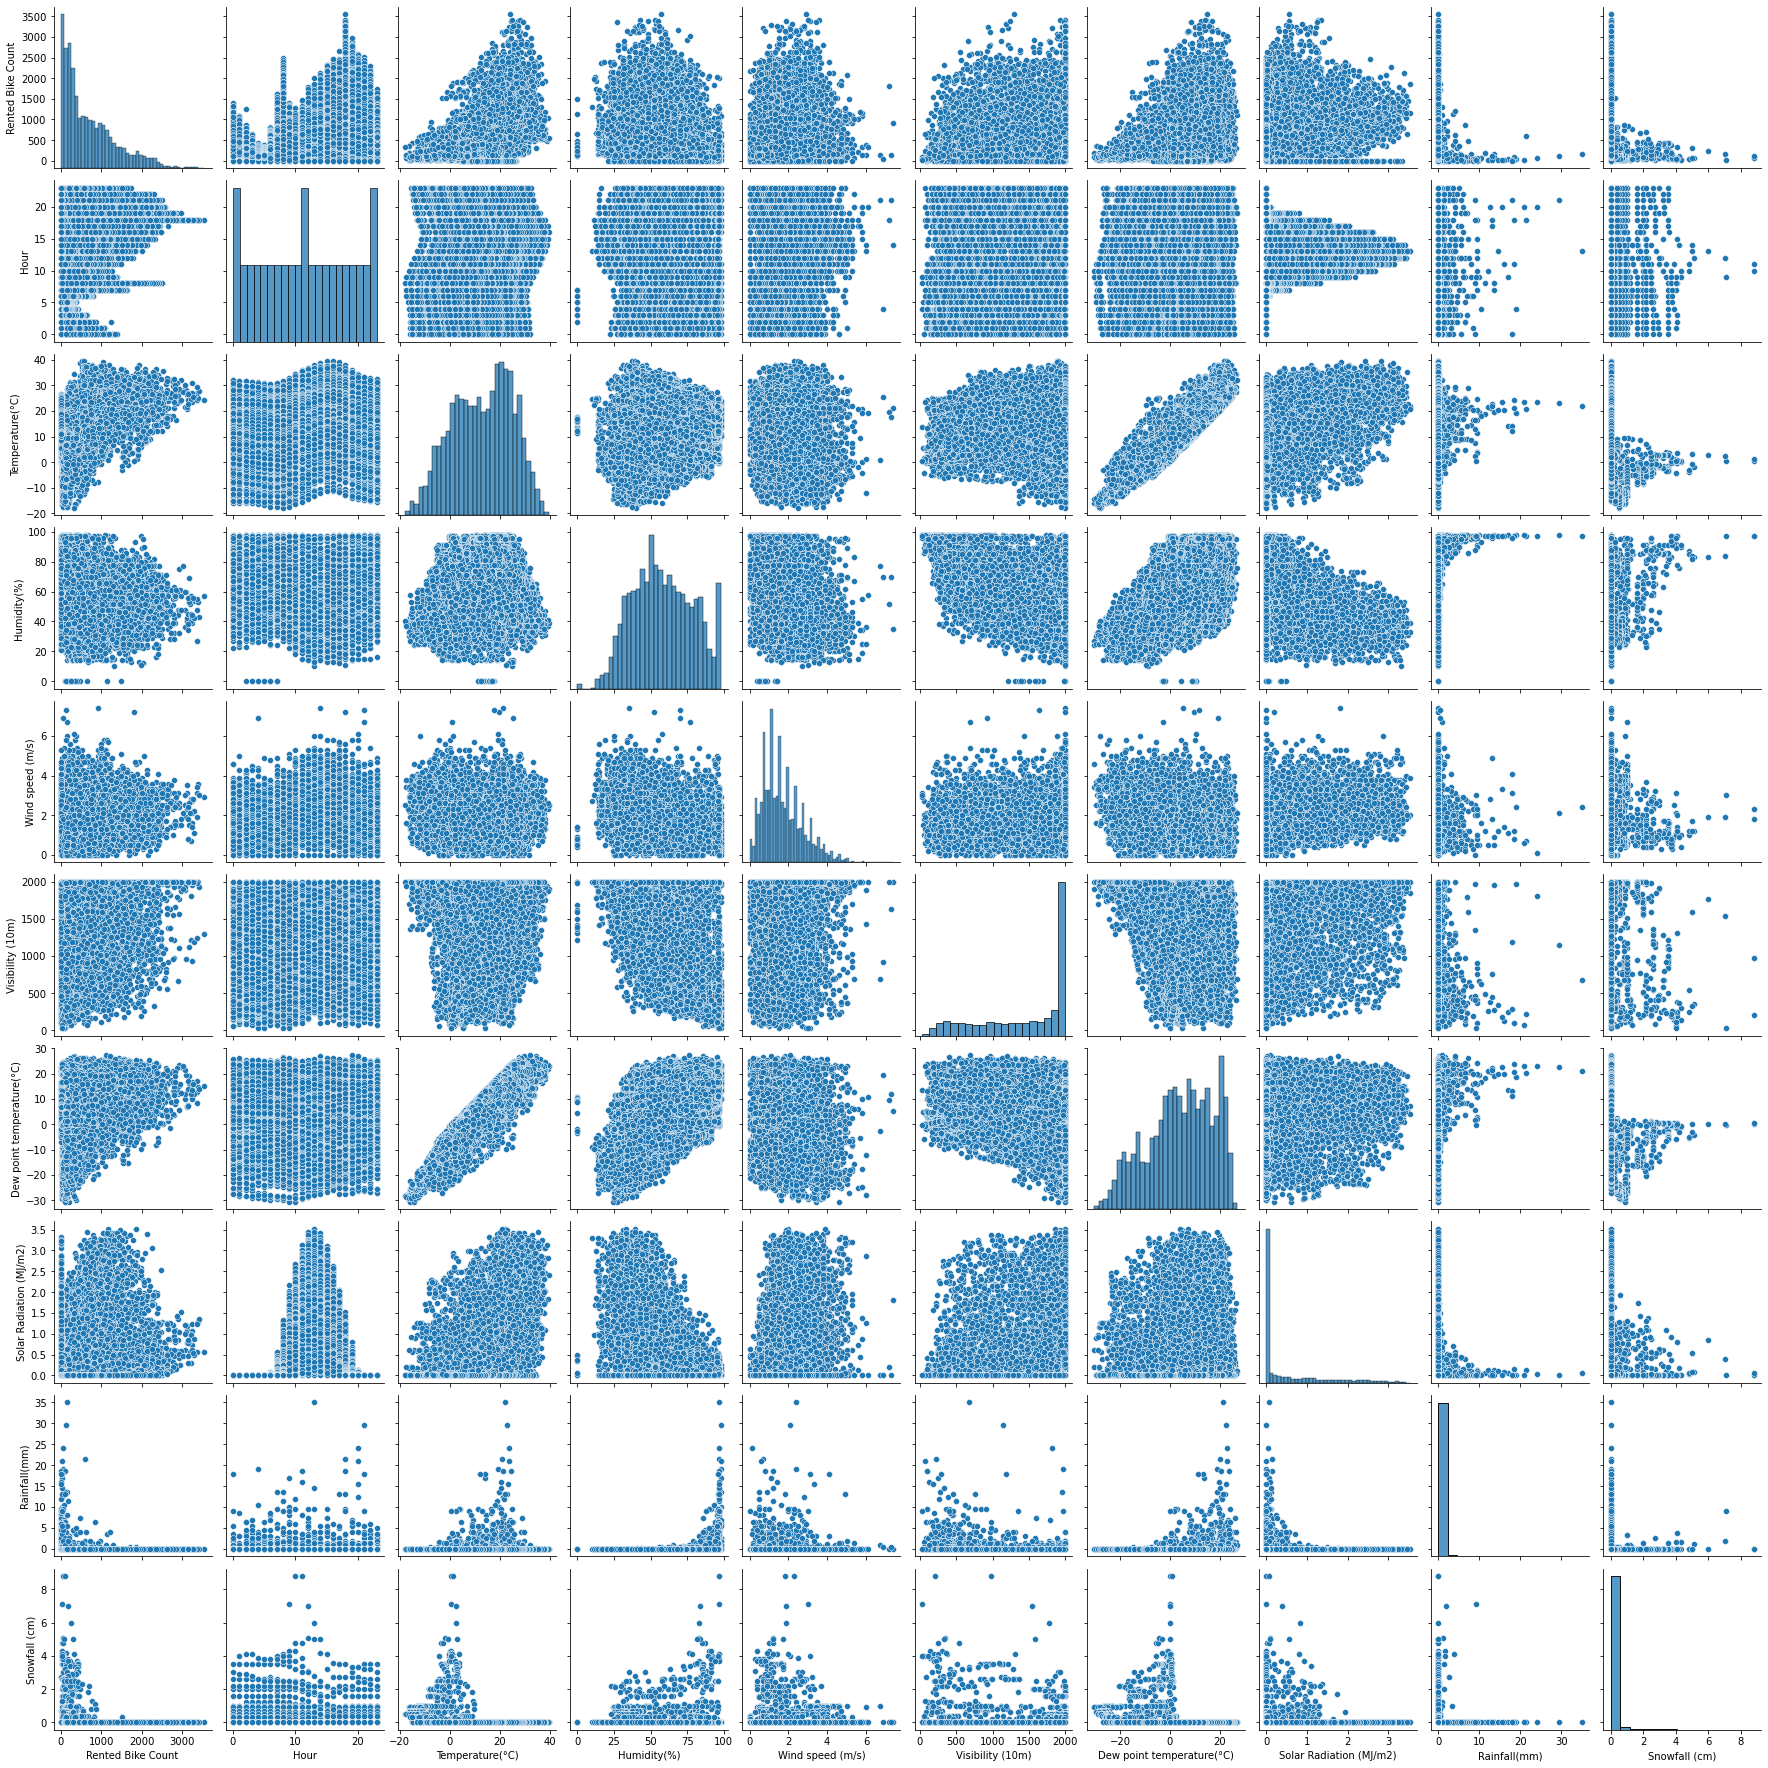

In [102]:
sns.pairplot(SeoulBikeData)

In [103]:
#Finding relation between Variables
plt.figure(figsize=(10,10))
sns.heatmap(SeoulBikeData.corr("pearson"),
            vmin=-1, vmax=1,
            cmap='coolwarm',
            annot=True, 
            square=True);


In [329]:
SeoulBikeData.describe()

Rented Bike Count         Hour  Temperature(°C)  Humidity(%)  \
count        8760.000000  8760.000000      8760.000000  8760.000000   
mean          704.602055    11.500000        12.882922    58.226256   
std           644.997468     6.922582        11.944825    20.362413   
min             0.000000     0.000000       -17.800000     0.000000   
25%           191.000000     5.750000         3.500000    42.000000   
50%           504.500000    11.500000        13.700000    57.000000   
75%          1065.250000    17.250000        22.500000    74.000000   
max          3556.000000    23.000000        39.400000    98.000000   

       Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
count       8760.000000       8760.000000                8760.000000   
mean           1.724909       1436.825799                   4.073813   
std            1.036300        608.298712                  13.060369   
min            0.000000         27.000000                 -30.600000   
25%            0.900000        940.000000                  -4.700000   
50%            1.500000       1698.000000                   5.100000   
75%            2.300000       2000.000000                  14.800000   
max            7.400000       2000.000000                  27.200000   

       Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)         year  \
count              8760.000000   8760.000000    8760.000000  8760.000000   
mean                  0.569111      0.148687       0.075068  2017.915068   
std                   0.868746      1.128193       0.436746     0.278796   
min                   0.000000      0.000000       0.000000  2017.000000   
25%                   0.000000      0.000000       0.000000  2018.000000   
50%                   0.010000      0.000000       0.000000  2018.000000   
75%                   0.930000      0.000000       0.000000  2018.000000   
max                   3.520000     35.000000       8.800000  2018.000000   

             month          day  
count  8760.000000  8760.000000  
mean      6.526027    15.720548  
std       3.448048     8.796749  
min       1.000000     1.000000  
25%       4.000000     8.000000  
50%       7.000000    16.000000  
75%      10.000000    23.000000  
max      12.000000    31.000000

<AxesSubplot:xlabel='Date'>

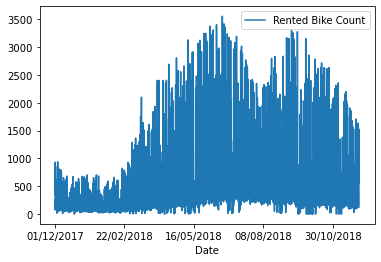

In [104]:
SeoulBikeData.plot(x='Date',y='Rented Bike Count',kind='line')
#we see a high raise between April to July of bikes rent ,seems like summer time more bikes are rented

In [105]:
SeoulBikeData.groupby('Seasons').sum()['Rented Bike Count'].plot.pie()

<AxesSubplot:ylabel='Rented Bike Count'>

In [106]:
#which hour is has more Rented bike count 
SeoulBikeData.groupby('Hour').sum()['Rented Bike Count'].plot.bar()
SeoulBikeData.groupby('Hour').sum()['Rented Bike Count'].plot()
#W can see Rented Bikes are more in between 7 AM to 9AM and 4PM to 8PM

<AxesSubplot:xlabel='Hour'>

<AxesSubplot:ylabel='Rented Bike Count'>

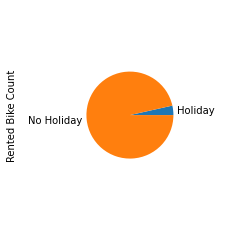

In [107]:
SeoulBikeData.groupby('Holiday').sum()['Rented Bike Count'].plot.pie(radius=0.5)

In [537]:
#Convert String Data Type DATE to DateTime and later Extracted the YEAR;MONTH;DAY as Numerical data for applying modelling
SeoulBikeData['Date']=pd.to_datetime(SeoulBikeData['Date'],format="%d/%m/%Y")
SeoulBikeData["year"] = SeoulBikeData["Date"].apply(lambda x: x.year)
SeoulBikeData["month"] = SeoulBikeData["Date"].apply(lambda x: x.month)
SeoulBikeData["day"] = SeoulBikeData["Date"].apply(lambda x: x.day)

In [538]:
SeoulBikeData.head(7)

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0 2017-12-01                254     0             -5.2           37   
1 2017-12-01                204     1             -5.5           38   
2 2017-12-01                173     2             -6.0           39   
3 2017-12-01                107     3             -6.2           40   
4 2017-12-01                 78     4             -6.0           36   
5 2017-12-01                100     5             -6.4           37   
6 2017-12-01                181     6             -6.6           35   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   
5               1.5              2000                      -18.7   
6               1.3              2000                      -19.5   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   
5                      0.0           0.0            0.0  Winter  No Holiday   
6                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  year  month  day  
0             Yes  2017     12    1  
1             Yes  2017     12    1  
2             Yes  2017     12    1  
3             Yes  2017     12    1  
4             Yes  2017     12    1  
5             Yes  2017     12    1  
6             Yes  2017     12    1

In [110]:
SeoulBikeData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

# My Response Variable here is Rented Bike Count

## Before Proceeding with Linear Model ,need to do Encoding for few Categorical Columns such as  Seasons

In [539]:
#I will drop Date Column since i have extracted the related information into NEW Columns
SeoulBikeData=SeoulBikeData.drop(['Date','Holiday','Functioning Day','year','month','day','Dew point temperature(°C)','Humidity(%)','Wind speed (m/s)','Visibility (10m)','Rainfall(mm)','Snowfall (cm)'],axis=1)

In [540]:
#Shuffle the rows of the dataframe (Required to SHUFFLE because my CROSS VALIDATION SCORE WAS resulting NEGATIVE)
data = SeoulBikeData.sample(frac = 1, random_state=0)

In [541]:
SeoulBikeData.Seasons.value_counts() # 4 Seasons (4 levels)

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [114]:
SeoulBikeData.Holiday.value_counts() #Binary Coloumn with No Holiday and Holiday

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

In [116]:
SeoulBikeData['Functioning Day'].value_counts() #Binary Column with Yes and No

Yes    8465
No      295
Name: Functioning Day, dtype: int64

In [117]:
SeoulBikeData['year'].value_counts() #here year is discrete column ,this seems to be Binary Column with 2018 and 2017 as the Years

2018    8016
2017     744
Name: year, dtype: int64

In [131]:

pd.get_dummies(SeoulBikeData['Seasons'])


Autumn  Spring  Summer  Winter
0          0       0       0       1
1          0       0       0       1
2          0       0       0       1
3          0       0       0       1
4          0       0       0       1
...      ...     ...     ...     ...
8755       1       0       0       0
8756       1       0       0       0
8757       1       0       0       0
8758       1       0       0       0
8759       1       0       0       0

[8760 rows x 4 columns]

In [129]:
emb1 = SeoulBikeData.Seasons
emb1_dummies = pd.get_dummies(SeoulBikeData.Seasons, prefix='EmbSeason')

emb1_dummies.head()

EmbSeason_Autumn  EmbSeason_Spring  EmbSeason_Summer  EmbSeason_Winter
0                 0                 0                 0                 1
1                 0                 0                 0                 1
2                 0                 0                 0                 1
3                 0                 0                 0                 1
4                 0                 0                 0                 1

In [127]:
emb2 = SeoulBikeData['Functioning Day']
emb2_dummies = pd.get_dummies(SeoulBikeData,columns=['Functioning Day'], prefix='Emb2')

emb2_dummies.head()



Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254     0             -5.2           37               2.2   
1                204     1             -5.5           38               0.8   
2                173     2             -6.0           39               1.0   
3                107     3             -6.2           40               0.9   
4                 78     4             -6.0           36               2.3   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                      -17.6                      0.0   
1              2000                      -17.6                      0.0   
2              2000                      -17.7                      0.0   
3              2000                      -17.6                      0.0   
4              2000                      -18.6                      0.0   

   Rainfall(mm)  Snowfall (cm) Seasons     Holiday  year  month  day  Emb2_No  \
0           0.0            0.0  Winter  No Holiday  2017     12    1        0   
1           0.0            0.0  Winter  No Holiday  2017     12    1        0   
2           0.0            0.0  Winter  No Holiday  2017     12    1        0   
3           0.0            0.0  Winter  No Holiday  2017     12    1        0   
4           0.0            0.0  Winter  No Holiday  2017     12    1        0   

   Emb2_Yes  
0         1  
1         1  
2         1  
3         1  
4         1

In [545]:
data

Rented Bike Count  Hour  Temperature(°C)  Solar Radiation (MJ/m2)  \
4059                320     3             10.7                     0.00   
6914                580     2             21.7                     0.00   
233                 226    17              3.6                     0.03   
982                 165    22             -9.7                     0.00   
5967                646    15             33.6                     1.98   
...                 ...   ...              ...                      ...   
4373                306     5             17.8                     0.00   
7891               1968    19             16.4                     0.00   
4859               1066    11             25.5                     3.01   
3264                401     0              8.3                     0.00   
2732                513    20              7.1                     0.00   

     Seasons  
4059  Spring  
6914  Autumn  
233   Winter  
982   Winter  
5967  Summer  
...      ...  
4373  Summer  
7891  Autumn  
4859  Summer  
3264  Spring  
2732  Spring  

[8760 rows x 5 columns]

In [546]:
#Dummy variable encoding for both Sex and Embarked variable 
df_dummy = pd.get_dummies(data,columns=['Seasons'],drop_first=True)

In [153]:
df_dummy=df_dummy.drop(['Dew point temperature(°C)'],axis=1)

In [553]:
df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8760 entries, 4059 to 2732
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8760 non-null   int64  
 1   Hour                     8760 non-null   int64  
 2   Temperature(°C)          8760 non-null   float64
 3   Solar Radiation (MJ/m2)  8760 non-null   float64
 4   Seasons_Spring           8760 non-null   uint8  
 5   Seasons_Summer           8760 non-null   uint8  
 6   Seasons_Winter           8760 non-null   uint8  
dtypes: float64(2), int64(2), uint8(3)
memory usage: 367.9 KB


In [559]:
#extract dependent and independent variables
X = df_dummy.drop(['Rented Bike Count','Seasons_Spring','Seasons_Summer','Seasons_Winter','Solar Radiation (MJ/m2)'],axis=1)
y = df_dummy.loc[:,['Rented Bike Count']]


In [560]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8760 entries, 4059 to 2732
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Hour             8760 non-null   int64  
 1   Temperature(°C)  8760 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 205.3 KB


In [561]:
import statsmodels.api as sm
X = sm.add_constant(X) 
ols = sm.OLS(y,X)
lr = ols.fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:      Rented Bike Count   R-squared:                       0.410
Model:                            OLS   Adj. R-squared:                  0.410
Method:                 Least Squares   F-statistic:                     3040.
Date:                Fri, 30 Apr 2021   Prob (F-statistic):               0.00
Time:                        21:46:16   Log-Likelihood:                -66790.
No. Observations:                8760   AIC:                         1.336e+05
Df Residuals:                    8757   BIC:                         1.336e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -13.6548     11.273     

In [562]:
maxp = lr.pvalues.max()
while(maxp > 0.05):
    X.drop(lr.pvalues.idxmax(),axis=1,inplace=True) 
    ols = sm.OLS(y,X)
    lr = ols.fit()
    maxp = lr.pvalues.max()
print(lr.summary())

                                 OLS Regression Results                                
Dep. Variable:      Rented Bike Count   R-squared (uncentered):                   0.731
Model:                            OLS   Adj. R-squared (uncentered):              0.731
Method:                 Least Squares   F-statistic:                          1.189e+04
Date:                Fri, 30 Apr 2021   Prob (F-statistic):                        0.00
Time:                        21:46:19   Log-Likelihood:                         -66791.
No. Observations:                8760   AIC:                                  1.336e+05
Df Residuals:                    8758   BIC:                                  1.336e+05
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

In [224]:
X

const  Hour  Temperature(°C)  Humidity(%)  Solar Radiation (MJ/m2)  \
0       1.0     0             -5.2           37                      0.0   
1       1.0     1             -5.5           38                      0.0   
2       1.0     2             -6.0           39                      0.0   
3       1.0     3             -6.2           40                      0.0   
4       1.0     4             -6.0           36                      0.0   
...     ...   ...              ...          ...                      ...   
8755    1.0    19              4.2           34                      0.0   
8756    1.0    20              3.4           37                      0.0   
8757    1.0    21              2.6           39                      0.0   
8758    1.0    22              2.1           41                      0.0   
8759    1.0    23              1.9           43                      0.0   

      Rainfall(mm)  year  month  
0              0.0  2017     12  
1              0.0  2017     12  
2              0.0  2017     12  
3              0.0  2017     12  
4              0.0  2017     12  
...            ...   ...    ...  
8755           0.0  2018     11  
8756           0.0  2018     11  
8757           0.0  2018     11  
8758           0.0  2018     11  
8759           0.0  2018     11  

[8760 rows x 8 columns]

In [563]:
#k-fold cross validation using linear regression model

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
cross_val_score(LinearRegression(),X,y,cv=4).mean()

0.4095147342920039

In [168]:
df_dummy.corr()


Rented Bike Count          Hour  Temperature(°C)  \
Rented Bike Count                 1.000000  4.102573e-01         0.538558   
Hour                              0.410257  1.000000e+00         0.124114   
Temperature(°C)                   0.538558  1.241145e-01         1.000000   
Humidity(%)                      -0.199780 -2.416438e-01         0.159371   
Wind speed (m/s)                  0.121108  2.851967e-01        -0.036252   
Visibility (10m)                  0.199280  9.875348e-02         0.034794   
Solar Radiation (MJ/m2)           0.261837  1.451309e-01         0.353505   
Rainfall(mm)                     -0.123074  8.714642e-03         0.050282   
Snowfall (cm)                    -0.141804 -2.151645e-02        -0.218405   
year                              0.215162  0.000000e+00         0.377796   
month                             0.133514  2.378988e-19         0.216183   
day                               0.022291  4.848940e-18         0.015645   
Seasons_Spring                    0.022888  1.686710e-19         0.007960   
Seasons_Summer                    0.296549  1.686710e-19         0.665846   
Seasons_Winter                   -0.424925 -1.019481e-19        -0.738720   
Holiday_No Holiday                0.072338  0.000000e+00         0.055931   
Functioning Day_Yes               0.203943  5.439377e-03        -0.050170   

                         Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
Rented Bike Count          -0.199780          0.121108          0.199280   
Hour                       -0.241644          0.285197          0.098753   
Temperature(°C)             0.159371         -0.036252          0.034794   
Humidity(%)                 1.000000         -0.336683         -0.543090   
Wind speed (m/s)           -0.336683          1.000000          0.171507   
Visibility (10m)           -0.543090          0.171507          1.000000   
Solar Radiation (MJ/m2)    -0.461919          0.332274          0.149738   
Rainfall(mm)                0.236397         -0.019674         -0.167629   
Snowfall (cm)               0.108183         -0.003554         -0.121695   
year                        0.035925         -0.003781          0.052381   
month                       0.139875         -0.156710          0.064874   
day                        -0.029044         -0.031977         -0.101759   
Seasons_Spring              0.015694          0.083855         -0.187498   
Seasons_Summer              0.192595         -0.064698          0.061958   
Seasons_Winter             -0.238295          0.109186          0.008616   
Holiday_No Holiday          0.050278         -0.023017         -0.031773   
Functioning Day_Yes        -0.020800          0.005037         -0.026000   

                         Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  \
Rented Bike Count                       0.261837     -0.123074      -0.141804   
Hour                                    0.145131      0.008715      -0.021516   
Temperature(°C)                         0.353505      0.050282      -0.218405   
Humidity(%)                            -0.461919      0.236397       0.108183   
Wind speed (m/s)                        0.332274     -0.019674      -0.003554   
Visibility (10m)                        0.149738     -0.167629      -0.121695   
Solar Radiation (MJ/m2)                 1.000000     -0.074290      -0.072301   
Rainfall(mm)                           -0.074290      1.000000       0.008500   
Snowfall (cm)                          -0.072301      0.008500       1.000000   
year                                    0.128086      0.027522      -0.206418   
month                                  -0.031595      0.011958       0.053121   
day                                    -0.002982     -0.001623       0.102077   
Seasons_Spring                          0.079974      0.017595      -0.099785   
Seasons_Summer                          0.128402      0.053928      -0.099785   
Seasons_Winter                         -0.178420     -

In [223]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y,random_state=0,test_size=0.3)

In [225]:
#import Linear Regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [226]:
#train the model
model.fit(X_train,y_train)

LinearRegression()

In [227]:
#predict y values
y_pred = model.predict(X_test)
y_pred

array([[336.07349014],
       [650.41439927],
       [505.8766091 ],
       ...,
       [454.23621054],
       [136.30420735],
       [605.64916331]])

In [246]:
#check the mean squared error between the predicted and true values on the test set
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

print(mean_absolute_error(y_test,y_pred)) # mae = mean(|y_pred - y_test|) #15 motality rates lower
print(mean_squared_error(y_test,y_pred))

323.65653535318023
184821.61235767955


In [247]:
#r^2 coefficient of determination

model.score(X_train,y_train)   #Training score

0.5557250986824235

In [230]:
model.score(X_test,y_test) 

0.4690602926650066

In [233]:
n = len(X_test)
k = len(X_test.iloc[0])
R2 = r2_score(y_test,y_pred)
R2

0.4690602926650066

In [234]:
#Adj R^2 is useful in multiple regression 
#as it accounts for number of variables in the scoring

Adj_R2 = 1 - ((n-1)*(1- R2)/(n-k-1))
print(Adj_R2)

0.4674384837078932


In [235]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df_standardised = pd.DataFrame(sc.fit_transform(df_dummy), columns=df_dummy.columns)
df_standardised.head()

Rented Bike Count      Hour  Temperature(°C)  Humidity(%)  \
0          -0.698650 -1.661325        -1.513957    -1.042483   
1          -0.776175 -1.516862        -1.539074    -0.993370   
2          -0.824240 -1.372399        -1.580936    -0.944257   
3          -0.926571 -1.227936        -1.597680    -0.895144   
4          -0.971535 -1.083473        -1.580936    -1.091596   

   Wind speed (m/s)  Visibility (10m)  Solar Radiation (MJ/m2)  Rainfall(mm)  \
0          0.458476          0.925871                -0.655132       -0.1318   
1         -0.892561          0.925871                -0.655132       -0.1318   
2         -0.699556          0.925871                -0.655132       -0.1318   
3         -0.796059          0.925871                -0.655132       -0.1318   
4          0.554978          0.925871                -0.655132       -0.1318   

   Snowfall (cm)      year     month       day  Seasons_Spring  \
0      -0.171891 -3.282407  1.587648 -1.673503       -0.580514   
1      -0.171891 -3.282407  1.587648 -1.673503       -0.580514   
2      -0.171891 -3.282407  1.587648 -1.673503       -0.580514   
3      -0.171891 -3.282407  1.587648 -1.673503       -0.580514   
4      -0.171891 -3.282407  1.587648 -1.673503       -0.580514   

   Seasons_Summer  Seasons_Winter  Holiday_No Holiday  Functioning Day_Yes  
0       -0.580514        1.748015            0.227757              0.18668  
1       -0.580514        1.748015            0.227757              0.18668  
2       -0.580514        1.748015            0.227757              0.18668  
3       -0.580514        1.748015            0.227757              0.18668  
4       -0.580514        1.748015            0.227757              0.18668

In [239]:
from sklearn.preprocessing import StandardScaler
X1 = df_dummy.drop(['Rented Bike Count','Visibility (10m)'],axis=1)
y1 = df_dummy.loc[:,['Rented Bike Count']]
standardised_X1 = StandardScaler()
X1_standardised = pd.DataFrame(standardised_X1.fit_transform(X1), columns=X1.columns)

In [240]:
import statsmodels.api as sm
X2 = sm.add_constant(X1) 
ols = sm.OLS(y1,X2)
lr = ols.fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:      Rented Bike Count   R-squared:                       0.554
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     722.8
Date:                Sun, 25 Apr 2021   Prob (F-statistic):               0.00
Time:                        14:39:40   Log-Likelihood:                -65568.
No. Observations:                8760   AIC:                         1.312e+05
Df Residuals:                    8744   BIC:                         1.313e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    1

In [241]:
maxp = lr.pvalues.max()
while(maxp > 0.05):
    X2.drop(lr.pvalues.idxmax(),axis=1,inplace=True) 
    ols = sm.OLS(y1,X2)
    lr = ols.fit()
    maxp = lr.pvalues.max()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:      Rented Bike Count   R-squared:                       0.554
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     722.8
Date:                Sun, 25 Apr 2021   Prob (F-statistic):               0.00
Time:                        14:40:18   Log-Likelihood:                -65568.
No. Observations:                8760   AIC:                         1.312e+05
Df Residuals:                    8744   BIC:                         1.313e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    1

In [242]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X1_standardised,y1,random_state=0,test_size=0.3)

In [243]:
#import Linear Regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [244]:
#train the model
model.fit(X_train,y_train)

LinearRegression()

In [245]:
#predict y values
y_pred = model.predict(X_test)
y_pred

array([[368.64784753],
       [811.20810566],
       [560.624653  ],
       ...,
       [442.42959134],
       [144.95828949],
       [766.41627603]])

In [248]:
#k-fold cross validation using linear regression model

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
cross_val_score(LinearRegression(),X1_standardised,y,cv=4).mean()

-5.60706159760579

In [249]:
SeoulBikeData.head()

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254     0             -5.2           37               2.2   
1                204     1             -5.5           38               0.8   
2                173     2             -6.0           39               1.0   
3                107     3             -6.2           40               0.9   
4                 78     4             -6.0           36               2.3   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                      -17.6                      0.0   
1              2000                      -17.6                      0.0   
2              2000                      -17.7                      0.0   
3              2000                      -17.6                      0.0   
4              2000                      -18.6                      0.0   

   Rainfall(mm)  Snowfall (cm) Seasons     Holiday Functioning Day  year  \
0           0.0            0.0  Winter  No Holiday             Yes  2017   
1           0.0            0.0  Winter  No Holiday             Yes  2017   
2           0.0            0.0  Winter  No Holiday             Yes  2017   
3           0.0            0.0  Winter  No Holiday             Yes  2017   
4           0.0            0.0  Winter  No Holiday             Yes  2017   

   month  day  
0     12    1  
1     12    1  
2     12    1  
3     12    1  
4     12    1

In [303]:
#extract dependent and independent variables
X = SeoulBikeData.drop(['Rented Bike Count','Humidity(%)','Dew point temperature(°C)','Visibility (10m)','Wind speed (m/s)','Rainfall(mm)','Snowfall (cm)','month','day','Holiday','Seasons','Functioning Day'],axis=1)
y = SeoulBikeData.loc[:,['Rented Bike Count']]


In [250]:
SeoulBikeData.corr()

Rented Bike Count          Hour  Temperature(°C)  \
Rented Bike Count                   1.000000  4.102573e-01         0.538558   
Hour                                0.410257  1.000000e+00         0.124114   
Temperature(°C)                     0.538558  1.241145e-01         1.000000   
Humidity(%)                        -0.199780 -2.416438e-01         0.159371   
Wind speed (m/s)                    0.121108  2.851967e-01        -0.036252   
Visibility (10m)                    0.199280  9.875348e-02         0.034794   
Dew point temperature(°C)           0.379788  3.054372e-03         0.912798   
Solar Radiation (MJ/m2)             0.261837  1.451309e-01         0.353505   
Rainfall(mm)                       -0.123074  8.714642e-03         0.050282   
Snowfall (cm)                      -0.141804 -2.151645e-02        -0.218405   
year                                0.215162  0.000000e+00         0.377796   
month                               0.133514  2.378988e-19         0.216183   
day                                 0.022291  4.848940e-18         0.015645   

                           Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
Rented Bike Count            -0.199780          0.121108          0.199280   
Hour                         -0.241644          0.285197          0.098753   
Temperature(°C)               0.159371         -0.036252          0.034794   
Humidity(%)                   1.000000         -0.336683         -0.543090   
Wind speed (m/s)             -0.336683          1.000000          0.171507   
Visibility (10m)             -0.543090          0.171507          1.000000   
Dew point temperature(°C)     0.536894         -0.176486         -0.176630   
Solar Radiation (MJ/m2)      -0.461919          0.332274          0.149738   
Rainfall(mm)                  0.236397         -0.019674         -0.167629   
Snowfall (cm)                 0.108183         -0.003554         -0.121695   
year                          0.035925         -0.003781          0.052381   
month                         0.139875         -0.156710          0.064874   
day                          -0.029044         -0.031977         -0.101759   

                           Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
Rented Bike Count                           0.379788                 0.261837   
Hour                                        0.003054                 0.145131   
Temperature(°C)                             0.912798                 0.353505   
Humidity(%)                                 0.536894                -0.461919   
Wind speed (m/s)                           -0.176486                 0.332274   
Visibility (10m)                           -0.176630                 0.149738   
Dew point temperature(°C)                   1.000000                 0.094381   
Solar Radiation (MJ/m2)                     0.094381                 1.000000   
Rainfall(mm)                                0.125597                -0.074290   
Snowfall (cm)                              -0.150887                -0.072301   
year                                        0.336350                 0.128086   
month                                       0.242552                -0.031595   
day                                         0.000153                -0.002982   

                           Rainfall(mm)  Snowfall (cm)      year  \
Rented Bike Count             -0.123074      -0.141804  0.215162   
Hour                           0.008715      -0.021516  0.000000   
Temperature(°C)                0.050282      -0.218405  0.377796   
Humidity(%)                    0.236397       0.108183  0.035925   
Wind speed (m/s)              -0.019674      -0.003554 -0.003781   
Visibility (10m)              -0.167629      -0.121695  0.052381   
Dew point temperature(°C)      0.125597      -0.150887  0.336350   
Solar Radiation (MJ/m2)       -0.074290      -0.072301  0.128086   
Rainfall(mm)                   1.000000       0.008500  0.027522   
Snowfall (cm

In [304]:
X

Hour  Temperature(°C)  Solar Radiation (MJ/m2)  year
0        0             -5.2                      0.0  2017
1        1             -5.5                      0.0  2017
2        2             -6.0                      0.0  2017
3        3             -6.2                      0.0  2017
4        4             -6.0                      0.0  2017
...    ...              ...                      ...   ...
8755    19              4.2                      0.0  2018
8756    20              3.4                      0.0  2018
8757    21              2.6                      0.0  2018
8758    22              2.1                      0.0  2018
8759    23              1.9                      0.0  2018

[8760 rows x 4 columns]

In [313]:
#k-fold cross validation using linear regression model

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
cross_val_score(LinearRegression(),X,y,cv=4).mean()

-0.9875094077662914

In [314]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y,random_state=0,test_size=0.3)

In [315]:
#import Linear Regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [316]:
#train the model
model.fit(X_train,y_train)

LinearRegression()

In [317]:
#r^2 coefficient of determination

model.score(X_train,y_train) 

0.4149509332983078

In [318]:
n = len(X_test)
k = len(X_test.iloc[0])
R2 = r2_score(y_test,y_pred)
R2

0.40181471701571525

In [319]:
#Adj R^2 is useful in multiple regression 
#as it accounts for number of variables in the scoring

Adj_R2 = 1 - ((n-1)*(1- R2)/(n-k-1))
print(Adj_R2)

0.40090250156320395


In [320]:
#check the mean squared error between the predicted and true values on the test set
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

print(mean_absolute_error(y_test,y_pred)) # mae = mean(|y_pred - y_test|) #15 motality rates lower
print(mean_squared_error(y_test,y_pred))

370.224851922993
244024.11483287212


In [321]:
X

Hour  Temperature(°C)  Solar Radiation (MJ/m2)  year
0        0             -5.2                      0.0  2017
1        1             -5.5                      0.0  2017
2        2             -6.0                      0.0  2017
3        3             -6.2                      0.0  2017
4        4             -6.0                      0.0  2017
...    ...              ...                      ...   ...
8755    19              4.2                      0.0  2018
8756    20              3.4                      0.0  2018
8757    21              2.6                      0.0  2018
8758    22              2.1                      0.0  2018
8759    23              1.9                      0.0  2018

[8760 rows x 4 columns]

In [322]:
#Dummy variable encoding for both Sex and Embarked variable 
df_SeoulBikeData = pd.get_dummies(SeoulBikeData,columns=['Seasons'],drop_first=True)

In [323]:
df_SeoulBikeData

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                   254     0             -5.2           37               2.2   
1                   204     1             -5.5           38               0.8   
2                   173     2             -6.0           39               1.0   
3                   107     3             -6.2           40               0.9   
4                    78     4             -6.0           36               2.3   
...                 ...   ...              ...          ...               ...   
8755               1003    19              4.2           34               2.6   
8756                764    20              3.4           37               2.3   
8757                694    21              2.6           39               0.3   
8758                712    22              2.1           41               1.0   
8759                584    23              1.9           43               1.3   

      Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0                 2000                      -17.6                      0.0   
1                 2000                      -17.6                      0.0   
2                 2000                      -17.7                      0.0   
3                 2000                      -17.6                      0.0   
4                 2000                      -18.6                      0.0   
...                ...                        ...                      ...   
8755              1894                      -10.3                      0.0   
8756              2000                       -9.9                      0.0   
8757              1968                       -9.9                      0.0   
8758              1859                       -9.8                      0.0   
8759              1909                       -9.3                      0.0   

      Rainfall(mm)  Snowfall (cm)     Holiday Functioning Day  year  month  \
0              0.0            0.0  No Holiday             Yes  2017     12   
1              0.0            0.0  No Holiday             Yes  2017     12   
2              0.0            0.0  No Holiday             Yes  2017     12   
3              0.0            0.0  No Holiday             Yes  2017     12   
4              0.0            0.0  No Holiday             Yes  2017     12   
...            ...            ...         ...             ...   ...    ...   
8755           0.0            0.0  No Holiday             Yes  2018     11   
8756           0.0            0.0  No Holiday             Yes  2018     11   
8757           0.0            0.0  No Holiday             Yes  2018     11   
8758           0.0            0.0  No Holiday             Yes  2018     11   
8759           0.0            0.0  No Holiday             Yes  2018     11   

      day  Seasons_Spring  Seasons_Summer  Seasons_Winter  
0       1               0               0               1  
1       1               0               0               1  
2       1               0               0               1  
3       1               0               0               1  
4       1               0               0               1  
...   ...             ...             ...             ...  
8755   30               0               0               0  
8756   30               0               0               0  
8757   30               0               0               0  
8758   30               0               0               0  
8759   30               0               0               0  

[8760 rows x 18 columns]

In [324]:
#extract dependent and independent variables
X = df_SeoulBikeData.drop(['Rented Bike Count','Humidity(%)','Dew point temperature(°C)','Visibility (10m)','Wind speed (m/s)','Rainfall(mm)','Snowfall (cm)','month','day','Holiday','Functioning Day'],axis=1)
y = SeoulBikeData.loc[:,['Rented Bike Count']]

In [325]:
X

Hour  Temperature(°C)  Solar Radiation (MJ/m2)  year  Seasons_Spring  \
0        0             -5.2                      0.0  2017               0   
1        1             -5.5                      0.0  2017               0   
2        2             -6.0                      0.0  2017               0   
3        3             -6.2                      0.0  2017               0   
4        4             -6.0                      0.0  2017               0   
...    ...              ...                      ...   ...             ...   
8755    19              4.2                      0.0  2018               0   
8756    20              3.4                      0.0  2018               0   
8757    21              2.6                      0.0  2018               0   
8758    22              2.1                      0.0  2018               0   
8759    23              1.9                      0.0  2018               0   

      Seasons_Summer  Seasons_Winter  
0                  0               1  
1                  0               1  
2                  0               1  
3                  0               1  
4                  0               1  
...              ...             ...  
8755               0               0  
8756               0               0  
8757               0               0  
8758               0               0  
8759               0               0  

[8760 rows x 7 columns]

In [12]:
#k-fold cross validation using linear regression model

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
cross_val_score(LinearRegression(),X,y,cv=4).mean()

C:\Users\Fujitsu\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Fujitsu\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Fujitsu\anaconda3\lib\site-packages\sklearn\linear_model\_base.py", line 505, in fit
    X, y = self._validate_data(X, y, accept_sparse=['csr', 'csc', 'coo'],
  File "C:\Users\Fujitsu\anaconda3\lib\site-packages\sklearn\base.py", line 432, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Fujitsu\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 72, in inner_f
    return f(**kwargs)
  File "C:\Users\Fujitsu\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 795, in check_X_y
    X = check_array(X, a

nan

In [326]:
#import Linear Regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [327]:
model.fit(X_train,y_train)

LinearRegression()

In [328]:
#r^2 coefficient of determination

model.score(X_train,y_train) 

0.4149509332983078

import statsmodels.formula.api as smf
model1=smf.OLS(y_train,x_train)
result = model1.fit()
result.summary()
y_pred = result.predict(x_test)

from sklearn.metrics import mean_squared_log_error
msle=mean_squared_log_error(y_pred,y_test)
rmsle=np.sqrt(msle)
print('RMLSE for the data:',rmsle)

In [5]:
SeoulBikeData

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0     01/12/2017                254     0             -5.2           37   
1     01/12/2017                204     1             -5.5           38   
2     01/12/2017                173     2             -6.0           39   
3     01/12/2017                107     3             -6.2           40   
4     01/12/2017                 78     4             -6.0           36   
...          ...                ...   ...              ...          ...   
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0                  2.2              2000                      -17.6   
1                  0.8              2000                      -17.6   
2                  1.0              2000                      -17.7   
3                  0.9              2000                      -17.6   
4                  2.3              2000                      -18.6   
...                ...               ...                        ...   
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
0                         0.0           0.0            0.0  Winter   
1                         0.0           0.0            0.0  Winter   
2                         0.0           0.0            0.0  Winter   
3                         0.0           0.0            0.0  Winter   
4                         0.0           0.0            0.0  Winter   
...                       ...           ...            ...     ...   
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day  
0     No Holiday             Yes  
1     No Holiday             Yes  
2     No Holiday             Yes  
3     No Holiday             Yes  
4     No Holiday             Yes  
...          ...             ...  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes  

[8760 rows x 14 columns]

In [6]:
#Shuffle the rows of the dataframe
data = SeoulBikeData.sample(frac = 1, random_state=0)

In [14]:
#extract dependent and independent variables
X = data.drop(['Rented Bike Count','Humidity(%)','Dew point temperature(°C)','Visibility (10m)','Wind speed (m/s)','Rainfall(mm)','Snowfall (cm)','Date','Holiday','Functioning Day','Seasons'],axis=1)
y = data.loc[:,['Rented Bike Count']]

In [15]:
X

Hour  Temperature(°C)  Solar Radiation (MJ/m2)
4059     3             10.7                     0.00
6914     2             21.7                     0.00
233     17              3.6                     0.03
982     22             -9.7                     0.00
5967    15             33.6                     1.98
...    ...              ...                      ...
4373     5             17.8                     0.00
7891    19             16.4                     0.00
4859    11             25.5                     3.01
3264     0              8.3                     0.00
2732    20              7.1                     0.00

[8760 rows x 3 columns]

In [16]:
#k-fold cross validation using linear regression model

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
cross_val_score(LinearRegression(),X,y,cv=4).mean()

0.4109652189146078

In [19]:
#Dummy variable encoding for both Sex and Embarked variable 
df_SeoulBikeData = pd.get_dummies(data,columns=['Seasons'],drop_first=True)

In [20]:
df_SeoulBikeData

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
4059  19/05/2018                320     3             10.7           73   
6914  15/09/2018                580     2             21.7           78   
233   10/12/2017                226    17              3.6           65   
982   10/01/2018                165    22             -9.7           51   
5967  06/08/2018                646    15             33.6           58   
...          ...                ...   ...              ...          ...   
4373  01/06/2018                306     5             17.8           75   
7891  25/10/2018               1968    19             16.4           47   
4859  21/06/2018               1066    11             25.5           57   
3264  16/04/2018                401     0              8.3           59   
2732  24/03/2018                513    20              7.1           83   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
4059               1.3              2000                        6.0   
6914               1.0              2000                       17.6   
233                4.3              1061                       -2.3   
982                2.8              2000                      -17.9   
5967               3.6              1448                       24.1   
...                ...               ...                        ...   
4373               1.0              1210                       13.3   
7891               1.0              1694                        5.0   
4859               1.8               943                       16.3   
3264               2.1              1912                        0.7   
2732               3.3               203                        4.4   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)     Holiday  \
4059                     0.00           0.0            0.0  No Holiday   
6914                     0.00           0.0            0.0  No Holiday   
233                      0.03           0.0            0.4  No Holiday   
982                      0.00           0.0            0.0  No Holiday   
5967                     1.98           0.0            0.0  No Holiday   
...                       ...           ...            ...         ...   
4373                     0.00           0.0            0.0  No Holiday   
7891                     0.00           0.0            0.0  No Holiday   
4859                     3.01           0.0            0.0  No Holiday   
3264                     0.00           0.0            0.0  No Holiday   
2732                     0.00           0.0            0.0  No Holiday   

     Functioning Day  Seasons_Spring  Seasons_Summer  Seasons_Winter  
4059             Yes               1               0               0  
6914             Yes               0               0               0  
233              Yes               0               0               1  
982              Yes               0               0               1  
5967             Yes               0               1               0  
...              ...             ...             ...             ...  
4373             Yes               0               1               0  
7891             Yes               0               0               0  
4859             Yes               0               1               0  
3264             Yes               1               0               0  
2732             Yes               1               0               0  

[8760 rows x 16 columns]

In [24]:
#Shuffle the rows of the dataframe
df_data = df_SeoulBikeData.sample(frac = 1, random_state=0)

In [25]:
#extract dependent and independent variables
X = df_data.drop(['Rented Bike Count','Humidity(%)','Dew point temperature(°C)','Visibility (10m)','Wind speed (m/s)','Rainfall(mm)','Snowfall (cm)','Date','Holiday','Functioning Day'],axis=1)
y = df_data.loc[:,['Rented Bike Count']]

In [26]:
#k-fold cross validation using linear regression model

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
cross_val_score(LinearRegression(),X,y,cv=4).mean()

0.42050733324022593

In [23]:
X

Hour  Temperature(°C)  Solar Radiation (MJ/m2)  Seasons_Spring  \
4059     3             10.7                     0.00               1   
6914     2             21.7                     0.00               0   
233     17              3.6                     0.03               0   
982     22             -9.7                     0.00               0   
5967    15             33.6                     1.98               0   
...    ...              ...                      ...             ...   
4373     5             17.8                     0.00               0   
7891    19             16.4                     0.00               0   
4859    11             25.5                     3.01               0   
3264     0              8.3                     0.00               1   
2732    20              7.1                     0.00               1   

      Seasons_Summer  Seasons_Winter  
4059               0               0  
6914               0               0  
233                0               1  
982                0               1  
5967               1               0  
...              ...             ...  
4373               1               0  
7891               0               0  
4859               1               0  
3264               0               0  
2732               0               0  

[8760 rows x 6 columns]

In [224]:
import pandas as pd
# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams


weatherAUS = pd.read_csv('data/weatherAUS.csv',encoding='ISO-8859-1',na_values='NA')

In [225]:
weatherAUS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [226]:
weatherAUS.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

In [111]:
weatherAUS.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [112]:
#Percentange of missing values
missingrows = weatherAUS.isna().sum()
for column in weatherAUS.columns:
    print('Percentage of missing values in {} is {}'.format(column,missingrows[column]/len(weatherAUS)))

Percentage of missing values in Date is 0.0
Percentage of missing values in Location is 0.0
Percentage of missing values in MinTemp is 0.010208992162793895
Percentage of missing values in MaxTemp is 0.008669049910628352
Percentage of missing values in Rainfall is 0.022418534304963565
Percentage of missing values in Evaporation is 0.43166506256015397
Percentage of missing values in Sunshine is 0.48009762133919975
Percentage of missing values in WindGustDir is 0.0709885879279527
Percentage of missing values in WindGustSpeed is 0.07055547916953114
Percentage of missing values in WindDir9am is 0.07263852605527293
Percentage of missing values in WindDir3pm is 0.02906641000962464
Percentage of missing values in WindSpeed9am is 0.01214766946239516
Percentage of missing values in WindSpeed3pm is 0.02105046060772721
Percentage of missing values in Humidity9am is 0.018245565791282826
Percentage of missing values in Humidity3pm is 0.0309844630826344
Percentage of missing values in Pressure9am is 

In [155]:
sum(weatherAUS.duplicated())

0

In [231]:
weatherAUS['RainToday'].value_counts()

0.0    110319
1.0     31880
Name: RainToday, dtype: int64

In [228]:
weatherAUS.RainToday = weatherAUS.RainToday.map(
                    {
                        'No': 0,
                        'Yes': 1
                    }
                    )

In [230]:
weatherAUS.RainTomorrow = weatherAUS.RainTomorrow.map(
                    {
                        'No': 0,
                        'Yes': 1
                    }
                    )

In [232]:
weatherAUS['RainTomorrow'].value_counts()

0.0    110316
1.0     31877
Name: RainTomorrow, dtype: int64

In [233]:
weatherAUS.corr()

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
MinTemp        1.000000  0.736555  0.103938     0.466993  0.072586   
MaxTemp        0.736555  1.000000 -0.074992     0.587932  0.470156   
Rainfall       0.103938 -0.074992  1.000000    -0.064351 -0.227549   
Evaporation    0.466993  0.587932 -0.064351     1.000000  0.365602   
Sunshine       0.072586  0.470156 -0.227549     0.365602  1.000000   
WindGustSpeed  0.177415  0.067615  0.133659     0.203021 -0.034750   
WindSpeed9am   0.175064  0.014450  0.087338     0.193084  0.005499   
WindSpeed3pm   0.175173  0.050300  0.057887     0.129400  0.053834   
Humidity9am   -0.232899 -0.504110  0.224405    -0.504092 -0.490819   
Humidity3pm    0.006089 -0.508855  0.255755    -0.390243 -0.629130   
Pressure9am   -0.450970 -0.332061 -0.168154    -0.270362  0.041970   
Pressure3pm   -0.461292 -0.427167 -0.126534    -0.293581 -0.019719   
Cloud9am       0.078754 -0.289370  0.198528    -0.183793 -0.675323   
Cloud3pm       0.021605 -0.277921  0.172403    -0.182618 -0.703930   
Temp9am        0.901821  0.887210  0.011192     0.545115  0.291188   
Temp3pm        0.708906  0.984503 -0.079657     0.572893  0.490501   
RainToday      0.055836 -0.229192  0.501516    -0.186945 -0.330522   
RainTomorrow   0.083936 -0.159237  0.239032    -0.119285 -0.450768   

               WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  \
MinTemp             0.177415      0.175064      0.175173    -0.232899   
MaxTemp             0.067615      0.014450      0.050300    -0.504110   
Rainfall            0.133659      0.087338      0.057887     0.224405   
Evaporation         0.203021      0.193084      0.129400    -0.504092   
Sunshine           -0.034750      0.005499      0.053834    -0.490819   
WindGustSpeed       1.000000      0.605303      0.686307    -0.215070   
WindSpeed9am        0.605303      1.000000      0.519547    -0.270858   
WindSpeed3pm        0.686307      0.519547      1.000000    -0.145525   
Humidity9am        -0.215070     -0.270858     -0.145525     1.000000   
Humidity3pm        -0.026327     -0.031614      0.016432     0.666949   
Pressure9am        -0.458744     -0.228743     -0.296351     0.139442   
Pressure3pm        -0.413749     -0.175817     -0.255439     0.186858   
Cloud9am            0.071736      0.025112      0.053337     0.452297   
Cloud3pm            0.109168      0.054639      0.025396     0.357326   
Temp9am             0.150150      0.128545      0.163030    -0.471354   
Temp3pm             0.032748      0.004569      0.027778    -0.498399   
RainToday           0.155761      0.103057      0.080591     0.353708   
RainTomorrow        0.234010      0.090995      0.087817     0.257161   

               Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
MinTemp           0.006089    -0.450970    -0.461292  0.078754  0.021605   
MaxTemp          -0.508855    -0.332061    -0.427167 -0.289370 -0.277921   
Rainfall          0.255755    -0.168154    -0.126534  0.198528  0.172403   
Evaporation      -0.390243    -0.270362    -0.293581 -0.183793 -0.182618   
Sunshine         -0.629130     0.041970    -0.019719 -0.675323 -0.703930   
WindGustSpeed    -0.026327    -0.458744    -0.413749  0.071736  0.109168   
WindSpeed9am     -0.031614    -0.228743    -0.175817  0.025112  0.054639   
WindSpeed3pm      0.016432    -0.296351    -0.255439  0.053337  0.025396   
Humidity9am       0.666949     0.139442     0.186858  0.452297  0.357326   
Humidity3pm       1.000000    -0.027544     0.051997  0.517120  0.523120   
Pressure9am      -0.027544     1.000000     0.961326 -0.129796 -0.147861   
Pressure3pm       0.051997     0.961326     1.000000 -0.060772 -0.084778   
Cloud9am          0.517120    -0.129796    -0.060772  1.000000  0.603564   
Cloud3pm          0.523120    -0.147861    -0.084778  0.603564  1.000000   
Temp9am          -0.221019    -0.422556    -0.470187 -0.136959 -0.126659   
Temp3pm          -0.557841    -0.286770    -0.389548 -0.302060 -0.317420   
RainT

In [223]:
weatherAUS.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8        NaN   
1       1010.6       1007.8       NaN       NaN     17.2     24.3        NaN   
2       1007.6       1008.7       NaN       2.0     21.0     23.2        NaN   
3       1017.6       1012.8       NaN       NaN     18.1     26.5        NaN   
4       1010.8       1006.0       7.0       8.0     17.8     29.7        NaN   

   RainTomorrow  
0           NaN  
1           NaN  
2           NaN  
3           NaN  
4           NaN  

[5 rows x 23 columns]

In [234]:
#Finding relation between Variables
plt.figure(figsize=(19,19))
sns.heatmap(weatherAUS.corr("pearson"),
            vmin=-1, vmax=1,
            cmap='coolwarm',
            annot=True, 
            square=True);


In [236]:
#Highly colinear
data=weatherAUS.drop(['Temp3pm','Cloud3pm','Pressure3pm','Humidity3pm','WindSpeed3pm','WindDir3pm','Date','MaxTemp','RainToday'],axis=1)

In [237]:
data

Location  MinTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0        Albury     13.4       0.6          NaN       NaN           W   
1        Albury      7.4       0.0          NaN       NaN         WNW   
2        Albury     12.9       0.0          NaN       NaN         WSW   
3        Albury      9.2       0.0          NaN       NaN          NE   
4        Albury     17.5       1.0          NaN       NaN           W   
...         ...      ...       ...          ...       ...         ...   
145455    Uluru      2.8       0.0          NaN       NaN           E   
145456    Uluru      3.6       0.0          NaN       NaN         NNW   
145457    Uluru      5.4       0.0          NaN       NaN           N   
145458    Uluru      7.8       0.0          NaN       NaN          SE   
145459    Uluru     14.9       0.0          NaN       NaN         NaN   

        WindGustSpeed WindDir9am  WindSpeed9am  Humidity9am  Pressure9am  \
0                44.0          W          20.0         71.0       1007.7   
1                44.0        NNW           4.0         44.0       1010.6   
2                46.0          W          19.0         38.0       1007.6   
3                24.0         SE          11.0         45.0       1017.6   
4                41.0        ENE           7.0         82.0       1010.8   
...               ...        ...           ...          ...          ...   
145455           31.0         SE          13.0         51.0       1024.6   
145456           22.0         SE          13.0         56.0       1023.5   
145457           37.0         SE           9.0         53.0       1021.0   
145458           28.0        SSE          13.0         51.0       1019.4   
145459            NaN        ESE          17.0         62.0       1020.2   

        Cloud9am  Temp9am  RainTomorrow  
0            8.0     16.9           0.0  
1            NaN     17.2           0.0  
2            NaN     21.0           0.0  
3            NaN     18.1           0.0  
4            7.0     17.8           0.0  
...          ...      ...           ...  
145455       NaN     10.1           0.0  
145456       NaN     10.9           0.0  
145457       NaN     12.5           0.0  
145458       3.0     15.1           0.0  
145459       8.0     15.0           NaN  

[145460 rows x 14 columns]

In [163]:
data.isna().sum()

Location             0
MinTemp           1485
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindSpeed9am      1767
Humidity9am       2654
Pressure9am      15065
Cloud9am         55888
Temp9am           1767
RainToday         3261
RainTomorrow      3267
dtype: int64

In [166]:
##numerical variables:
quantitative = weatherAUS.select_dtypes(include = ["int64","float64"]).keys()
print(quantitative)

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm'],
      dtype='object')


In [167]:
#Categorical variables:
qualitative = data.select_dtypes(include = ["object"]).keys()
print(qualitative)
print(type(qualitative))

Index(['Location', 'WindGustDir', 'WindDir9am', 'RainToday', 'RainTomorrow'], dtype='object')
<class 'pandas.core.indexes.base.Index'>


In [168]:
##numerical variables:
quantitative = data.select_dtypes(include = ["int64","float64"]).keys()
print(quantitative)

Index(['MinTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed',
       'WindSpeed9am', 'Humidity9am', 'Pressure9am', 'Cloud9am', 'Temp9am'],
      dtype='object')


In [170]:
data.WindDir9am.mode()[0]

'N'

In [239]:
data.fillna({
                 'WindGustDir': data.WindGustDir.mode()[0],
                 'WindDir9am': data.WindDir9am.mode()[0],
                 'RainTomorrow': data.RainTomorrow.mode()[0]
            },
        inplace = True)

In [240]:
#HISTOGRAM FOR ALL NUMERICAL VARIABLES
plt.figure(figsize=(20,20)) #This makes the figure's width 8 inches, and its height 8 inches'
data[quantitative].hist()
sns.despine()

<Figure size 1440x1440 with 0 Axes>

In [194]:
#Percentange of missing values
missingrows = data.isna().sum()
for column in data.columns:
    print('Percentage of missing values in {} is {}'.format(column,missingrows[column]/len(data)))

Percentage of missing values in Location is 0.0
Percentage of missing values in MinTemp is 0.010208992162793895
Percentage of missing values in Rainfall is 0.022418534304963565
Percentage of missing values in Evaporation is 0.43166506256015397
Percentage of missing values in Sunshine is 0.48009762133919975
Percentage of missing values in WindGustDir is 0.0
Percentage of missing values in WindGustSpeed is 0.07055547916953114
Percentage of missing values in WindDir9am is 0.0
Percentage of missing values in WindSpeed9am is 0.01214766946239516
Percentage of missing values in Humidity9am is 0.018245565791282826
Percentage of missing values in Pressure9am is 0.10356799120032999
Percentage of missing values in Cloud9am is 0.3842155919153032
Percentage of missing values in Temp9am is 0.01214766946239516
Percentage of missing values in RainToday is 0.0
Percentage of missing values in RainTomorrow is 0.0


In [190]:
data.Evaporation.median()

4.8

In [191]:
data.Sunshine.median()

8.4

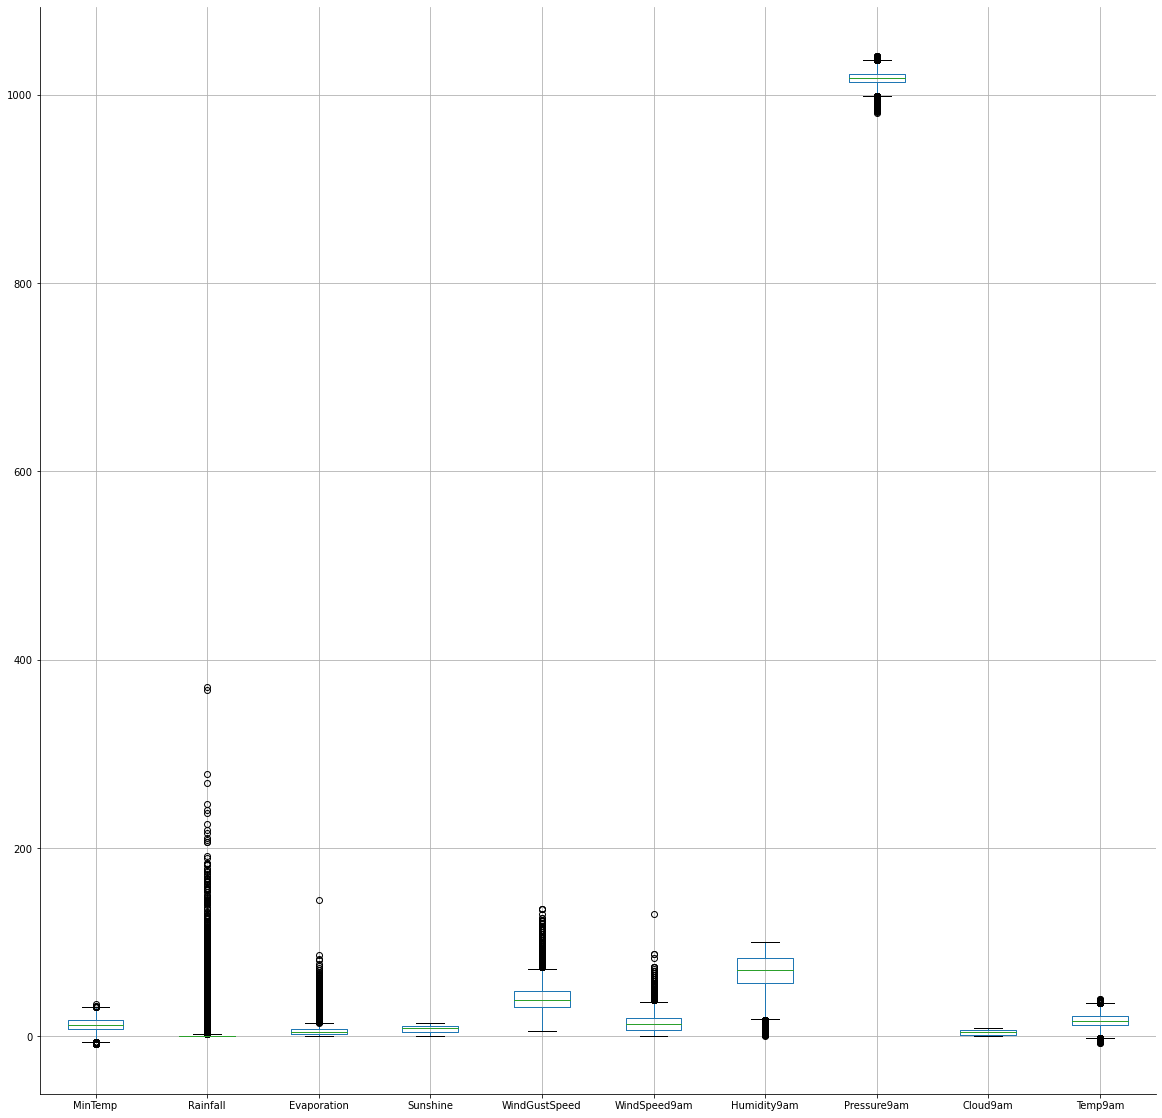

In [195]:
#HISTOGRAM FOR ALL NUMERICAL VARIABLES
plt.figure(figsize=(20,20)) #This makes the figure's width 8 inches, and its height 8 inches'
data[quantitative].boxplot()
sns.despine()

In [192]:
print(quantitative)

Index(['MinTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed',
       'WindSpeed9am', 'Humidity9am', 'Pressure9am', 'Cloud9am', 'Temp9am'],
      dtype='object')


In [241]:
data.fillna({
                 'Evaporation': data.Evaporation.median(),
                 'Sunshine': data.Sunshine.median(),
                 'Cloud9am': data.Cloud9am.mean(),
                 
            },
        inplace = True)

In [242]:
data.isna().sum()

Location             0
MinTemp           1485
Rainfall          3261
Evaporation          0
Sunshine             0
WindGustDir          0
WindGustSpeed    10263
WindDir9am           0
WindSpeed9am      1767
Humidity9am       2654
Pressure9am      15065
Cloud9am             0
Temp9am           1767
RainTomorrow         0
dtype: int64

In [243]:
data=data.dropna()

In [244]:
data.isna().sum()

Location         0
MinTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindSpeed9am     0
Humidity9am      0
Pressure9am      0
Cloud9am         0
Temp9am          0
RainTomorrow     0
dtype: int64

In [202]:
data

Location  MinTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0        Albury     13.4       0.6          4.8       8.4           W   
1        Albury      7.4       0.0          4.8       8.4         WNW   
2        Albury     12.9       0.0          4.8       8.4         WSW   
3        Albury      9.2       0.0          4.8       8.4          NE   
4        Albury     17.5       1.0          4.8       8.4           W   
...         ...      ...       ...          ...       ...         ...   
145454    Uluru      3.5       0.0          4.8       8.4           E   
145455    Uluru      2.8       0.0          4.8       8.4           E   
145456    Uluru      3.6       0.0          4.8       8.4         NNW   
145457    Uluru      5.4       0.0          4.8       8.4           N   
145458    Uluru      7.8       0.0          4.8       8.4          SE   

        WindGustSpeed WindDir9am  WindSpeed9am  Humidity9am  Pressure9am  \
0                44.0          W          20.0         71.0       1007.7   
1                44.0        NNW           4.0         44.0       1010.6   
2                46.0          W          19.0         38.0       1007.6   
3                24.0         SE          11.0         45.0       1017.6   
4                41.0        ENE           7.0         82.0       1010.8   
...               ...        ...           ...          ...          ...   
145454           31.0        ESE          15.0         59.0       1024.7   
145455           31.0         SE          13.0         51.0       1024.6   
145456           22.0         SE          13.0         56.0       1023.5   
145457           37.0         SE           9.0         53.0       1021.0   
145458           28.0        SSE          13.0         51.0       1019.4   

        Cloud9am  Temp9am RainToday RainTomorrow  
0       8.000000     16.9        No           No  
1       4.447461     17.2        No           No  
2       4.447461     21.0        No           No  
3       4.447461     18.1        No           No  
4       7.000000     17.8        No           No  
...          ...      ...       ...          ...  
145454  4.447461      9.4        No           No  
145455  4.447461     10.1        No           No  
145456  4.447461     10.9        No           No  
145457  4.447461     12.5        No           No  
145458  3.000000     15.1        No           No  

[121435 rows x 15 columns]

In [214]:
print(qualitative)
len(data['RainToday'].value_counts())

Index(['Location', 'WindGustDir', 'WindDir9am', 'RainToday', 'RainTomorrow'], dtype='object')


2

In [245]:
data=pd.get_dummies(data,columns=['Location','WindGustDir','WindDir9am'],drop_first=True)

In [246]:
#extract dependent and independent variables
X = data.drop(['RainTomorrow'],axis=1)
y = data.loc[:,['RainTomorrow']]

In [247]:
y.value_counts()   #No: NORAIN, YES:RAINS

RainTomorrow
0.0             95041
1.0             26394
dtype: int64

In [248]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y,random_state=0,test_size=0.3)

In [249]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train) #use only training set 
                                           #to make any adjustments to the model
                                           #during training

In [284]:
#import Logistic Regression 
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=500, tol=0.001)
model.fit(X_train_scaled,y_train)

LogisticRegression(max_iter=500, tol=0.001)

In [285]:
model

LogisticRegression(max_iter=500, tol=0.001)

In [271]:
model.intercept_ #b0

array([-1.78688623])

In [272]:
model.coef_

array([[ 2.24255223e-01,  1.53540664e-01, -5.50197736e-03,
        -6.61784314e-01,  6.14561165e-01,  1.17121365e-02,
         7.41038293e-01, -3.95194856e-01,  1.18383704e-01,
        -1.36261184e-01, -2.17897111e-02, -1.31436980e-01,
        -5.13727304e-02, -1.24294573e-01, -5.79235579e-02,
         6.17232840e-02,  2.83450678e-04, -1.25962393e-01,
        -6.74234765e-02,  7.84488322e-03, -1.18231300e-01,
        -9.84224670e-02, -3.13331689e-03, -1.99812981e-01,
        -7.19168882e-02, -5.82110501e-02, -1.78784400e-01,
        -2.35299095e-01, -1.89598323e-01, -1.36976563e-01,
        -1.10573042e-01, -1.01757273e-01, -4.24921223e-02,
        -5.33602245e-02, -1.33904180e-01, -1.02409054e-01,
        -1.14790502e-03, -7.74421588e-02, -6.90653490e-02,
        -6.07140889e-02, -1.62804435e-01, -6.18025836e-02,
        -1.16455515e-01, -1.16306940e-01, -4.02214255e-02,
        -6.46513476e-02, -1.10718847e-01,  3.11055897e-02,
        -1.76603101e-01, -9.42279449e-02,  3.38609117e-0

In [286]:
#To be able to test we need to scale the test data too (X part only) 
#using the same scaler that was used to scale the training data
X_test_scaled = sc.transform(X_test)

In [287]:
#Predict_proba gives the probabilities P(y=Ci|x)
model.predict_proba(X_test_scaled)

array([[0.90120549, 0.09879451],
       [0.90419757, 0.09580243],
       [0.94269301, 0.05730699],
       ...,
       [0.96117178, 0.03882822],
       [0.97503997, 0.02496003],
       [0.35018776, 0.64981224]])

In [275]:
probabilities_test = model.predict_proba(X_test_scaled)[:,1]
probabilities_test[10:20] #second column belongs to class 1, ie, p = P(y=1|x)

array([0.21829081, 0.70022843, 0.29903477, 0.01203397, 0.74818429,
       0.06726883, 0.05296441, 0.10234236, 0.21748015, 0.08353207])

In [288]:
#Whereas predict method gives the class prediction as either 0 or 1
y_predict = model.predict(X_test_scaled)
y_predict[10:20]

array([0., 1., 0., 0., 1., 0., 0., 0., 0., 0.])

In [289]:
#Performance measures for classification
#Accuracy = total no. of correct prediction/total no. of datapoints

model.score(X_test_scaled,y_test)

0.8298427163679284

In [290]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y_test,y_predict)

0.8298427163679284

In [291]:
'''
        Predicted
        0   1
True  0 TN  FP
      1 FN  TP

'''
cm1 = confusion_matrix(y_test,y_predict)
cm1

array([[27047,  1516],
       [ 4683,  3185]], dtype=int64)

In [280]:
#Fpr = fp/(tn+fp)
#tpr = tp/(fn+tp)

fpr1= 1516/(27047+1516)
print(fpr1)
tpr1 = 3185/(4683+3185)
print(tpr1)

0.05307565731890908
0.40480427046263345


In [282]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

         0.0       0.85      0.95      0.90     28563
         1.0       0.68      0.40      0.51      7868

    accuracy                           0.83     36431
   macro avg       0.76      0.68      0.70     36431
weighted avg       0.81      0.83      0.81     36431



In [283]:
#ROC is the curve traced by the co-ordinates (FPR,TPR) 
#for different probability threshold values
#AUC is the area under the ROC curve

from sklearn.metrics import roc_auc_score, roc_curve
y_pred_prob = model.predict_proba(X_test_scaled)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)


import  matplotlib.pyplot as plt
plt.plot(fpr,tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Roc with auc score: {}'.format(roc_auc_score(y_test,y_pred_prob)))
plt.show()


In [564]:
import pandas as pd
# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams


winequality_red = pd.read_csv('data/winequality-red.csv',na_values='NA')

In [565]:
winequality_red

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

In [566]:
#Finding Missing Values
winequality_red.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [567]:
sum(winequality_red.duplicated())

240

In [568]:
winequality_red = winequality_red.drop_duplicates()

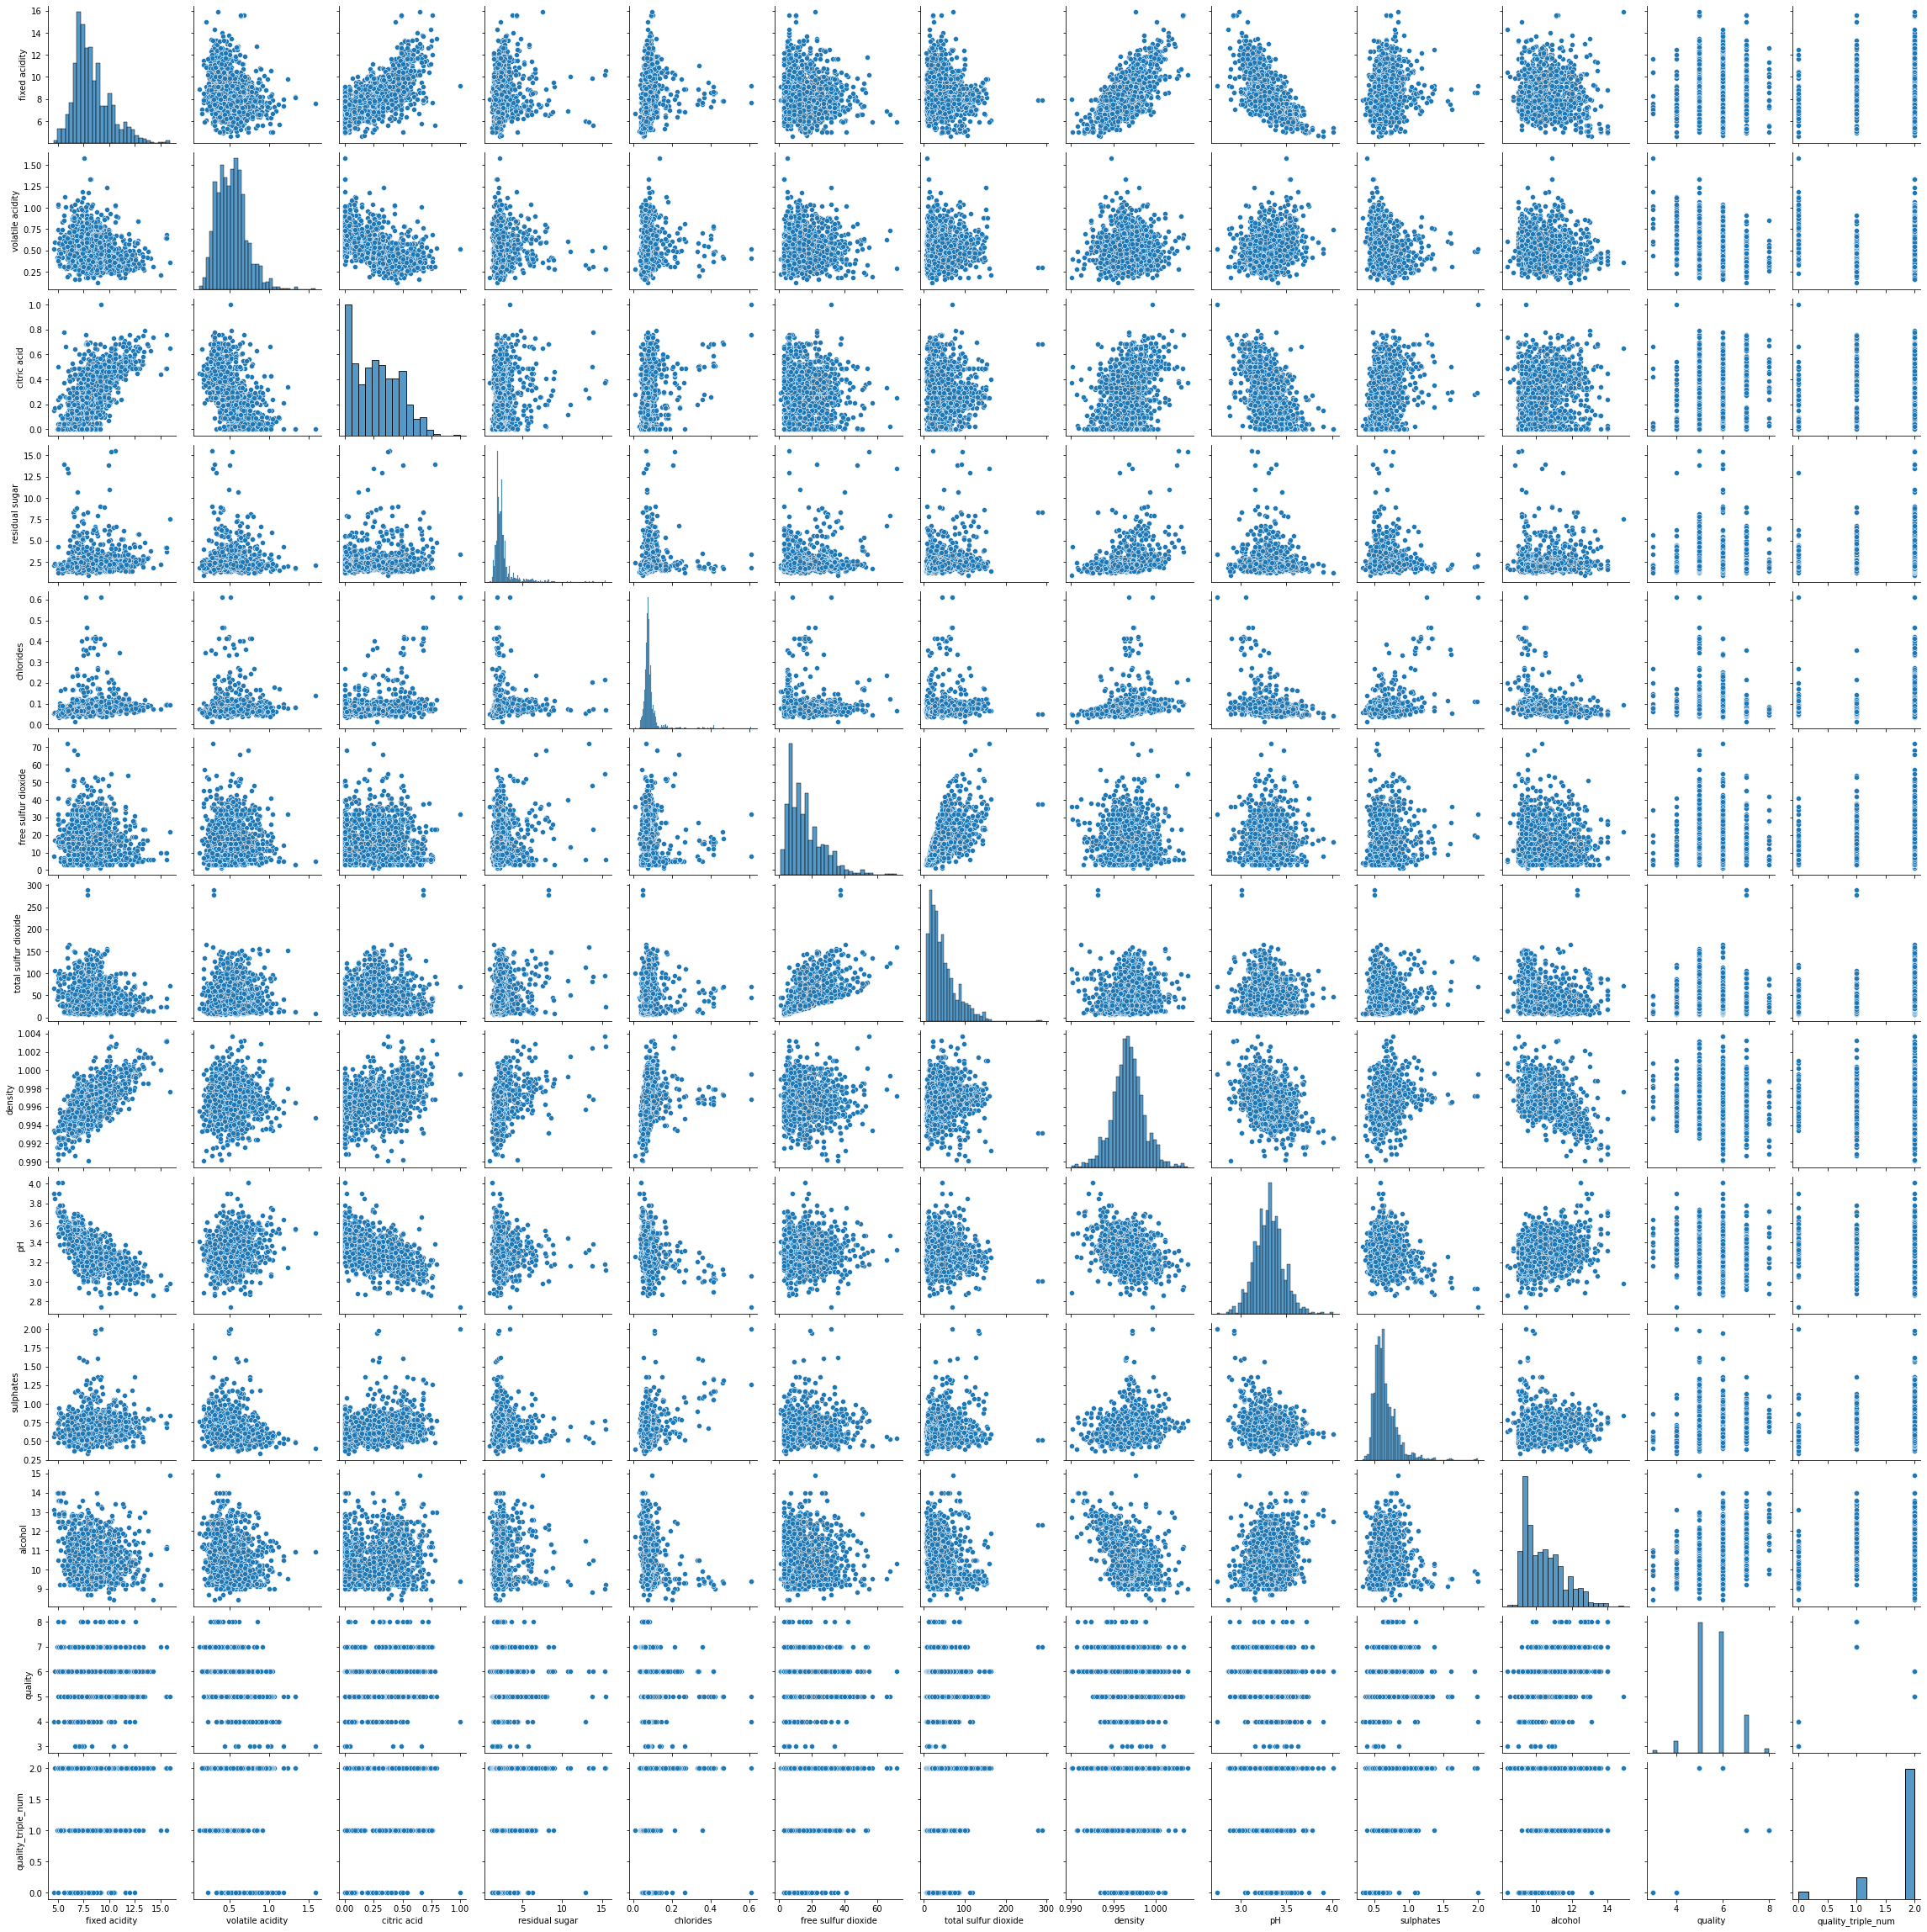

In [456]:
sns.pairplot(winequality_red)

<AxesSubplot:>

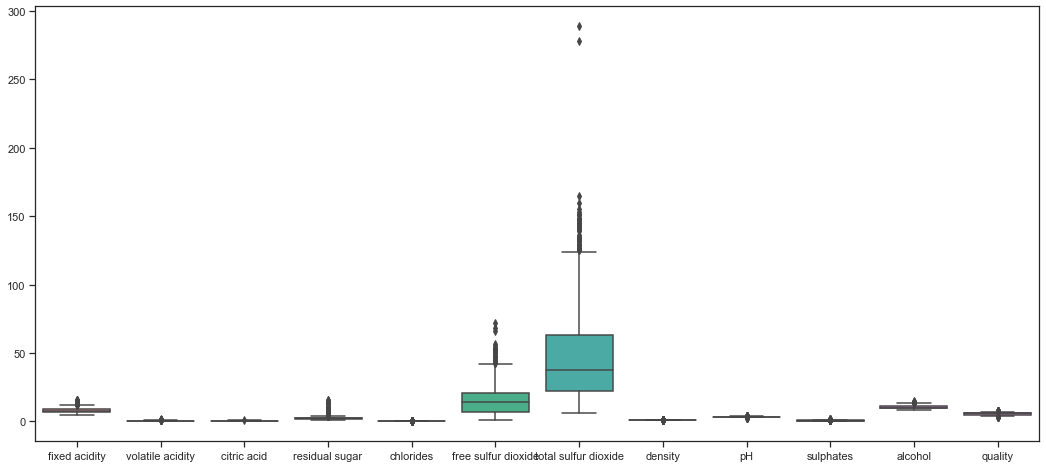

In [569]:
sns.set_theme(style="ticks", palette="pastel")

plt.figure(figsize=(18,8))
sns.boxplot(data=winequality_red)

In [570]:
winequality_red.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 138.0 KB


ids = weather_data["Formatted Date"]
weather_data[ids.isin(ids[ids.duplicated()])].sort_values("Formatted Date")

<AxesSubplot:xlabel='quality', ylabel='count'>

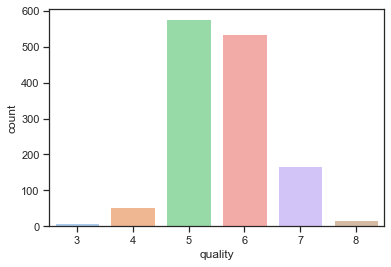

In [571]:
sns.countplot(x=winequality_red['quality'])

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

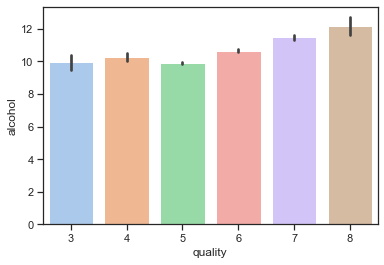

In [573]:
sns.barplot(x = 'quality', y = 'alcohol',data= winequality_red)

In [574]:
winequality_red['quality'].value_counts()

5    577
6    535
7    167
4     53
8     17
3     10
Name: quality, dtype: int64

In [575]:
winequality_red['quality_triple_num'] = winequality_red['quality'].map(
                                         { 3 : 0,  4 : 0, 
                                           5 : 2,  6 : 2,
                                           7 : 1,  8 : 1})
winequality_red['quality_triple'] = winequality_red['quality'].map(
                                                       { 3 : 'bad',  4 : 'bad', 
                                                     5 : 'good',  6 : 'good',
                                                   7 : 'very good',  8 : 'very good'})
winequality_red.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
5            7.4              0.66         0.00             1.8      0.075   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
5                 13.0                  40.0   0.9978  3.51       0.56   

   alcohol  quality  quality_triple_num quality_triple  
0      9.4        5                   2           good  
1      9.8        5                   2           good  
2      9.8        5                   2           good  
3      9.8        6                   2           good  
5      9.4        5                   2           good

In [576]:
winequality_red['quality_triple'].value_counts()

good         1112
very good     184
bad            63
Name: quality_triple, dtype: int64

In [577]:
winequality_red['quality_triple_num'].value_counts()

2    1112
1     184
0      63
Name: quality_triple_num, dtype: int64

In [578]:
winequality_red.shape

(1359, 14)

In [579]:
winequality_red.corr()

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.255124     0.667437   
volatile acidity          -0.255124          1.000000    -0.551248   
citric acid                0.667437         -0.551248     1.000000   
residual sugar             0.111025         -0.002449     0.143892   
chlorides                  0.085886          0.055154     0.210195   
free sulfur dioxide       -0.140580         -0.020945    -0.048004   
total sulfur dioxide      -0.103777          0.071701     0.047358   
density                    0.670195          0.023943     0.357962   
pH                        -0.686685          0.247111    -0.550310   
sulphates                  0.190269         -0.256948     0.326062   
alcohol                   -0.061596         -0.197812     0.105108   
quality                    0.119024         -0.395214     0.228057   
quality_triple_num        -0.031401         -0.013901    -0.044053   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.111025   0.085886            -0.140580   
volatile acidity           -0.002449   0.055154            -0.020945   
citric acid                 0.143892   0.210195            -0.048004   
residual sugar              1.000000   0.026656             0.160527   
chlorides                   0.026656   1.000000             0.000749   
free sulfur dioxide         0.160527   0.000749             1.000000   
total sulfur dioxide        0.201038   0.045773             0.667246   
density                     0.324522   0.193592            -0.018071   
pH                         -0.083143  -0.270893             0.056631   
sulphates                  -0.011837   0.394557             0.054126   
alcohol                     0.063281  -0.223824            -0.080125   
quality                     0.013640  -0.130988            -0.050463   
quality_triple_num         -0.056219   0.036327             0.113605   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.103777  0.670195 -0.686685   0.190269   
volatile acidity                  0.071701  0.023943  0.247111  -0.256948   
citric acid                       0.047358  0.357962 -0.550310   0.326062   
residual sugar                    0.201038  0.324522 -0.083143  -0.011837   
chlorides                         0.045773  0.193592 -0.270893   0.394557   
free sulfur dioxide               0.667246 -0.018071  0.056631   0.054126   
total sulfur dioxide              1.000000  0.078141 -0.079257   0.035291   
density                           0.078141  1.000000 -0.355617   0.146036   
pH                               -0.079257 -0.355617  1.000000  -0.214134   
sulphates                         0.035291  0.146036 -0.214134   1.000000   
alcohol                          -0.217829 -0.504995  0.213418   0.091621   
quality                          -0.177855 -0.184252 -0.055245   0.248835   
quality_triple_num                0.155971  0.106240 -0.050059  -0.063322   

                       alcohol   quality  quality_triple_num  
fixed acidity        -0.061596  0.119024           -0.031401  
volatile acidity     -0.197812 -0.395214           -0.013901  
citric acid           0.105108  0.228057           -0.044053  
residual sugar        0.063281  0.013640           -0.056219  
chlorides            -0.223824 -0.130988            0.036327  
free sulfur dioxide  -0.080125 -0.050463            0.113605  
total sulfur dioxide -0.217829 -0.177855            0.155971  
density              -0.504995 -0.184252            0.106240  
pH                    0.213418 -0.055245           -0.050059  
sulphates             0.091621  0.248835           -0.063322  
alcohol               1.000000  0.480343           -0.234740  
quality               0.480343  1.000000           -0.078943  
quality_triple_num   -0.234740 -0.078943            1.000000

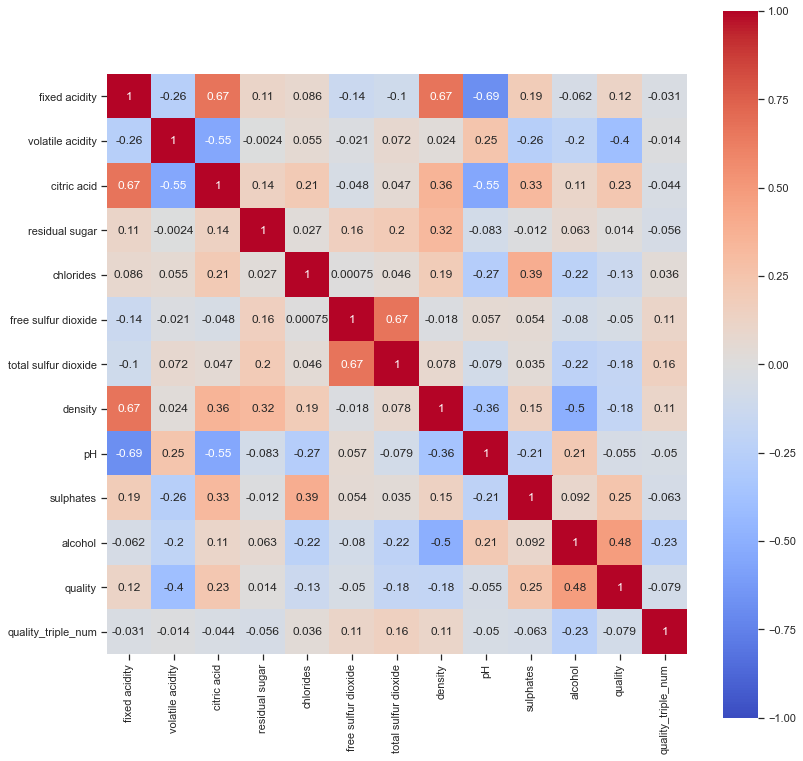

In [580]:
#Finding relation between Variables
plt.figure(figsize=(13,13))
sns.heatmap(winequality_red.corr("pearson"),
            vmin=-1, vmax=1,
            cmap='coolwarm',
            annot=True, 
            square=True);

<AxesSubplot:>

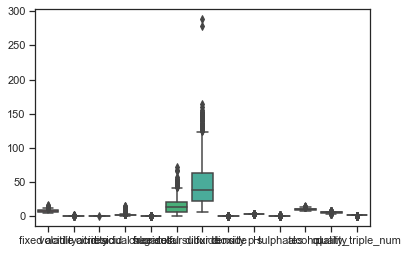

In [583]:
sns.boxplot(data=winequality_red)

(array([619., 396., 191.,  97.,  44.,  10.,   0.,   0.,   0.,   2.]),
 array([  6. ,  34.3,  62.6,  90.9, 119.2, 147.5, 175.8, 204.1, 232.4,
        260.7, 289. ]),
 <BarContainer object of 10 artists>)

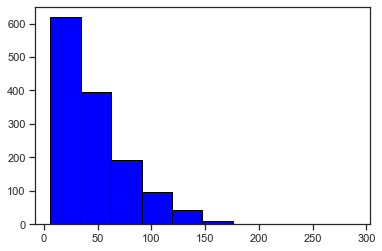

In [584]:
plt.hist(winequality_red['total sulfur dioxide'], color = 'blue', edgecolor = 'black')

In [585]:
plt.hist(winequality_red['free sulfur dioxide'], color = 'blue', edgecolor = 'black')

(array([396., 385., 258., 168.,  96.,  33.,  10.,  10.,   0.,   3.]),
 array([ 1. ,  8.1, 15.2, 22.3, 29.4, 36.5, 43.6, 50.7, 57.8, 64.9, 72. ]),
 <BarContainer object of 10 artists>)

In [428]:
#extract dependent and independent variables #free sulfur dioxide is highly correlated to total sulfur dioxide
X = drop(['quality_triple_num','quality','quality_triple','free sulfur dioxide'],axis=1)
y = winequality_red.loc[:,['quality_triple_num']]

In [336]:
X

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
5               7.4             0.660         0.00             1.8      0.075   
...             ...               ...          ...             ...        ...   
1593            6.8             0.620         0.08             1.9      0.068   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      total sulfur dioxide  density    pH  sulphates  alcohol  
0                     34.0  0.99780  3.51       0.56      9.4  
1                     67.0  0.99680  3.20       0.68      9.8  
2                     54.0  0.99700  3.26       0.65      9.8  
3                     60.0  0.99800  3.16       0.58      9.8  
5                     40.0  0.99780  3.51       0.56      9.4  
...                    ...      ...   ...        ...      ...  
1593                  38.0  0.99651  3.42       0.82      9.5  
1594                  44.0  0.99490  3.45       0.58     10.5  
1595                  51.0  0.99512  3.52       0.76     11.2  
1597                  44.0  0.99547  3.57       0.71     10.2  
1598                  42.0  0.99549  3.39       0.66     11.0  

[1359 rows x 10 columns]

In [337]:
y

quality_triple_num
0                      1
1                      1
2                      1
3                      1
5                      1
...                  ...
1593                   1
1594                   1
1595                   1
1597                   1
1598                   1

[1359 rows x 1 columns]

In [429]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y,random_state=0,test_size=0.3)

In [514]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train,y_train) #use only training set 
                                           #to make any adjustments to the model
                                           #during training

In [515]:
X_train_scaled

array([[-0.67982051,  0.29534757, -1.350217  , ...,  0.68516718,
         0.17768906,  0.32746416],
       [ 1.294431  , -0.78608678,  0.97423276, ..., -1.666686  ,
         1.16588961,  0.8773765 ],
       [-0.44755562,  0.18720413, -1.24915397, ...,  0.29319165,
        -0.19288615,  0.32746416],
       ...,
       [ 1.12023234,  0.02498898,  0.51944911, ..., -0.88273494,
         0.73355187, -1.32227286],
       [-0.56368807,  0.72792131, -1.09755942, ...,  0.55450867,
        -0.13112361, -0.31410024],
       [-0.67982051,  0.403491  , -1.24915397, ...,  1.07714271,
        -0.31641122, -0.68070847]])

In [516]:
outlier=pd.DataFrame(X_train_scaled)

<AxesSubplot:>

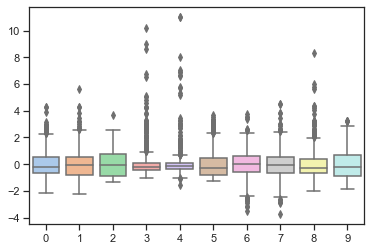

In [517]:
sns.boxplot(data=outlier)

In [474]:
 outlier_list_col = outlier[(outlier[3] < 3) | (outlier[3] > 3)]

In [477]:
 outlier_list_col = outlier[(outlier[4] < 3) | (outlier[4] > 3) | (outlier[8] > 3) | (outlier[1] > 3) ]

In [518]:
indexNames = outlier[ ((outlier[3] > 3) | (outlier[4] > 3) | (outlier[8] > 3) ) ].index
indexNames

Int64Index([ 37, 113, 128, 158, 160, 165, 180, 181, 229, 233, 240, 279, 337,
            356, 376, 412, 435, 464, 466, 491, 493, 502, 508, 519, 524, 563,
            603, 609, 629, 646, 647, 664, 694, 755, 809, 826, 831, 836, 849,
            853, 893, 923, 927, 943, 948],
           dtype='int64')

In [519]:
outlier.drop(indexNames , inplace=True)

In [520]:
outlier

0         1         2         3         4         5         6  \
0   -0.679821  0.295348 -1.350217 -0.218228 -0.188209 -0.070290 -0.769199   
1    1.294431 -0.786087  0.974233 -0.218228 -0.251389 -0.594326 -0.359653   
2   -0.447556  0.187204 -1.249154  0.097835 -0.209269 -0.347721 -0.580593   
3   -0.505622  0.295348 -0.945965  1.520118 -0.019731 -0.532675  0.405551   
4    0.481504 -1.272732  0.367855 -0.376259 -0.483046 -0.655977 -0.801532   
..        ...       ...       ...       ...       ...       ...       ...   
945  1.120232 -1.110517  0.974233 -0.455275 -0.125030 -1.149188 -0.197990   
946 -0.854019  0.187204 -1.350217  0.018819 -0.314568  0.546224 -0.936251   
947  2.281557 -0.461656  1.125827 -0.850354 -0.251389 -1.241665  0.136113   
949 -0.563688  0.727921 -1.097559  0.887992  0.422524 -0.810106  0.297776   
950 -0.679821  0.403491 -1.249154  0.018819 -0.125030  1.255214  0.432495   

            7         8         9  
0    0.685167  0.177689  0.327464  
1   -1.666686  1.165890  0.877376  
2    0.293192 -0.192886  0.327464  
3    0.423850 -0.934037 -1.322273  
4   -0.360101  1.165890  1.152333  
..        ...       ...       ...  
945 -1.405369 -1.057562 -0.039144  
946  0.750496 -0.563461  0.694072  
947 -1.209381 -0.131124 -0.039144  
949  0.554509 -0.131124 -0.314100  
950  1.077143 -0.316411 -0.680708  

[906 rows x 10 columns]

<AxesSubplot:>

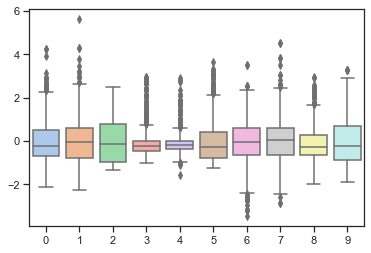

In [512]:
sns.boxplot(data=outlier)

In [524]:
y_train

quality_triple_num
1171                   2
1015                   2
1379                   2
18                     0
1007                   1
...                  ...
888                    2
979                    2
1434                   2
646                    2
792                    2

[951 rows x 1 columns]

In [521]:
#import Logistic Regression 
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=550, tol=0.005,multi_class='ovr',class_weight={0:13, 1:3 ,2:1})
model.fit(outlier,y_train)

ValueError: Found input variables with inconsistent numbers of samples: [906, 951]

In [446]:
winequality_red['quality_triple_num'].value_counts()

2    1112
1     184
0      63
Name: quality_triple_num, dtype: int64

In [387]:
model.intercept_ #b0

array([-1.32151254, -0.22512772, -2.34232585])

In [388]:
model.coef_

array([[ 1.0547798 ,  0.9937594 ,  0.3414802 ,  0.20703416,  0.67877114,
        -0.5301669 , -0.93191901,  1.21520136, -0.37598914, -1.23378703],
       [-0.96204562, -0.58541057, -0.36641616, -0.33423304,  0.04535595,
         0.62502389,  0.97467462, -0.64528082, -0.41891593,  0.05614043],
       [ 0.49606927, -0.79261232, -0.3649893 ,  0.32127636, -0.63170928,
        -0.55312575, -0.13874679, -0.26160601,  1.10021299,  1.58101977]])

In [447]:
#To be able to test we need to scale the test data too (X part only) 
#using the same scaler that was used to scale the training data
X_test_scaled = sc.transform(X_test)

In [448]:
#Predict_proba gives the probabilities P(y=Ci|x)
model.predict_proba(X_test_scaled)

array([[0.11322817, 0.44794366, 0.43882818],
       [0.11667516, 0.00720319, 0.87612165],
       [0.230853  , 0.01158248, 0.75756452],
       ...,
       [0.0637291 , 0.75468041, 0.18159048],
       [0.31096343, 0.03347336, 0.65556321],
       [0.17706408, 0.03312653, 0.78980939]])

In [449]:
probabilities_test = model.predict_proba(X_test_scaled)[:,1]
probabilities_test[10:20] #second column belongs to class 1, ie, p = P(y=1|x)

array([0.01701706, 0.62197567, 0.05959503, 0.00236707, 0.66797824,
       0.05878978, 0.47969187, 0.29814847, 0.02131316, 0.07654197])

In [450]:
#Whereas predict method gives the class prediction as either 0 or 1
y_predict = model.predict(X_test_scaled)
y_predict[10:20]

array([2, 1, 0, 0, 1, 0, 2, 2, 0, 2], dtype=int64)

In [451]:
#Performance measures for classification
#Accuracy = total no. of correct prediction/total no. of datapoints

model.score(X_test_scaled,y_test)

0.6323529411764706

In [452]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y_test,y_predict)

0.6323529411764706

In [453]:
'''
        Predicted
        0   1  2
True  0 TP  FP FN
      1 FN  TP FN
      2 FN  FN TP
0-BAD ;1-GOOD ;2- VERY GOOD
'''
cm1 = confusion_matrix(y_test,y_predict)
cm1

array([[ 10,   1,   5],
       [  3,  37,  23],
       [ 68,  50, 211]], dtype=int64)

In [334]:
#Fpr = fp/(tn+fp)
#tpr = tp/(fn+tp)

fpr1= 1516/(27047+1516)
print(fpr1)
tpr1 = 3185/(4683+3185)
print(tpr1)

0.05307565731890908
0.40480427046263345


In [454]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.12      0.62      0.21        16
           1       0.42      0.59      0.49        63
           2       0.88      0.64      0.74       329

    accuracy                           0.63       408
   macro avg       0.48      0.62      0.48       408
weighted avg       0.78      0.63      0.68       408



[Text(0.5, 0, 'Predicted'), Text(0, 0.5, 'True')]

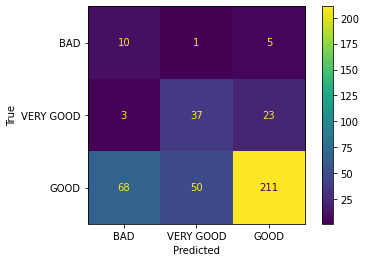

In [455]:
from sklearn.metrics import plot_confusion_matrix, ConfusionMatrixDisplay
import numpy as np
cm = confusion_matrix(y_test, y_predict)
cmd = ConfusionMatrixDisplay(cm, display_labels=['BAD','VERY GOOD','GOOD'])
cmd.plot()
cmd.ax_.set(xlabel='Predicted', ylabel='True')

In [441]:
winequality_red['quality_triple_num'].value_counts()

2    1112
1     184
0      63
Name: quality_triple_num, dtype: int64

In [442]:
winequality_red['quality_triple'].value_counts()

good         1112
very good     184
bad            63
Name: quality_triple, dtype: int64

In [ ]:
# compute with formulas from the theory
yhat = model.predict(X)
SS_Residual = sum((y-yhat)**2)       
SS_Total = sum((y-np.mean(y))**2)     
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
print r_squared, adjusted_r_squared
# 0.877643371323 0.863248473832

# compute with sklearn linear_model, although could not find any function to compute adjusted-r-square directly from documentation
print model.score(X, y), 1 - (1-model.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1)
# 0.877643371323 0.863248473832 